# Сборный проект: Анализ данных

#### Оглавление
[1. Получение данных](#1.0)  
[2. Предобработка данных](#2.0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Названия столбцов](#2.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Типы данных](#2.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Пропуски](#2.3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Суммарные продажи](#2.4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.5. Выводы](#2.5)  
[3. Исследовательский анализ данных](#3.0)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1. Данные за весь период](#3.1)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.2. Выбор потенциальных платформ](#3.2)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.3. Boxplot для общих продаж](#3.3)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.4. Влияние отзывов на продажи](#3.4)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.5. Распределение игр по жанрам](#3.5)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.6. Выводы](#3.6)  
[4. Портреты пользователей по регионам](#4.0)  
[5. Проверка гипотез](#5.0)  
[6. Вывод](#6.0)

В проекте испольлуются данные о продажах компьютерных игр, их оценках и т. д. за несколько лет, на их основе необходимо спланировать кампанию на 2017 год

**Задача:** Выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина компьютерных игр

**Описание данных:**

| Название столбца | Описание данных |
|------------------|-----------------|
|`name` | название игры |
|`platform` | платформа |
|`year_of_release` | год выпуска |
|`genre` | жанр игры |
|`na_sales` | продажи в Северной Америке (миллионы проданных копий) |
|`eu_sales` | продажи в Европе (миллионы проданных копий) |
|`jp_sales` | продажи в Японии (миллионы проданных копий) |
|`other_sales` | продажи в других странах (миллионы проданных копий) |
|`critic_score` | оценка критиков (максимум 100) |
|`user_score` | оценка пользователей (максимум 10) |
|`rating` | рейтинг от организации ESRB |

## 1. Получение данных
<a class="anchor" id="1.0"></a>

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
plt.style.use('https://drive.google.com/uc?id=1NKA45YUOjoDwewGrI88Nx_hrqtBv5kuI&export=download')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Получим набор данных и сохраним его в переменной `df`

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Получим основную информацию о датасете

In [3]:
def get_inf(df):
    '''
    Принимает датафрейм и возвращает
    - первые 5 строк
    - основную информацию о датасете
    - описательные статистики
    - число пропусков по столбцам
    '''
    display(df.head())
    display(df.info())
    display(df.describe())
    print(f'Число пропусков: \n{df.isna().sum()}\n')

In [4]:
get_inf(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Число пропусков: 
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64



Для знакомства с данными построим гистограммы для всех числовых столбцов датафрейма:

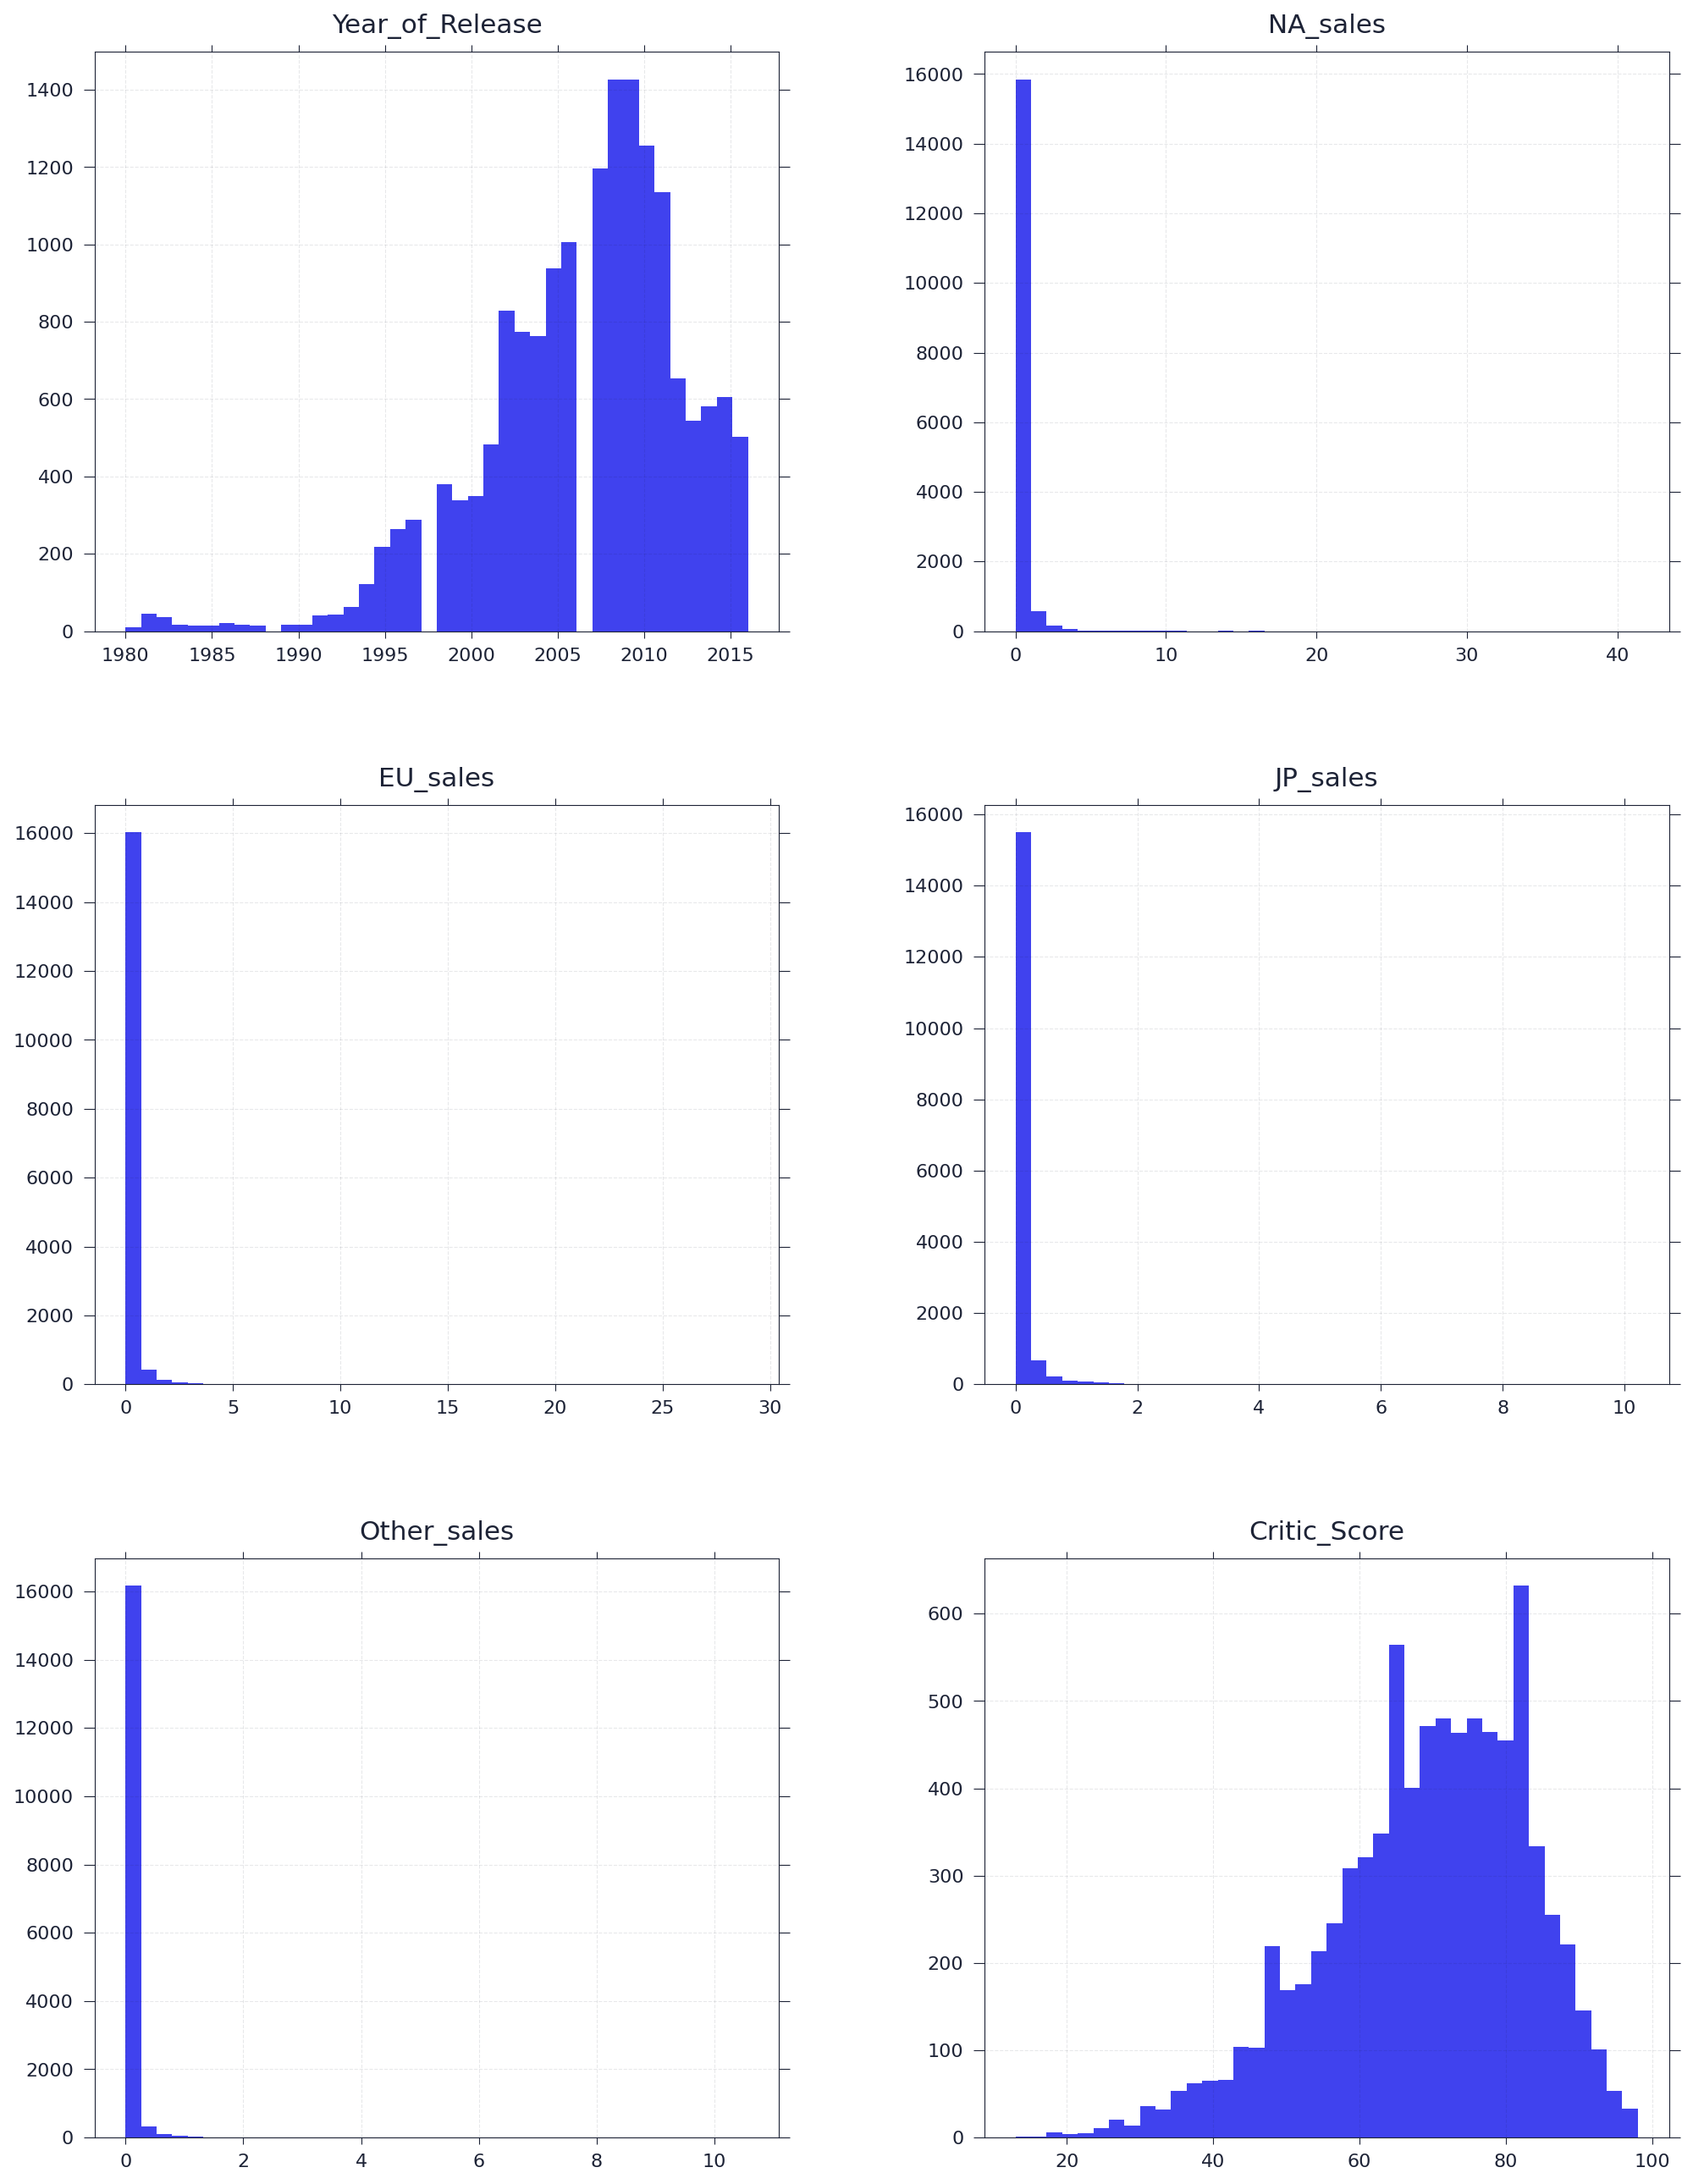

In [5]:
df.hist(figsize=(15, 20), bins=40);

**Выводы:**
1. Датасет содержит данные о компьютерных играх: основная информация об игре, ее продажи и оценки от пользователей и критиков;
2. Всего в датасете 11 столбцов и 16 715 наблюдений; пропуски:
    * В столбцах с информацией о платформе и продажах нет пропусков;
    * В столбцах `Name` и `Genre` — по 2 пропуска;
    * В столбце `Year_of_Release` — 269 пропусков;
    * Больше всего пропусков в столбцах с рейтингами: `Critic_Score` (8 578), `User_Score` (6 701) и `Rating` (6 766);
4. Не все столбцы приведены к правильному типу данных (например, столбец `User_Score`, содержащий числовые значения, имеет тип данных `object`)

## 2. Предобработка данных
<a class="anchor" id="2.0"></a>

### 2.1. Названия столбцов
<a class="anchor" id="2.1"></a>

Приведем названия столбцов к нижнему регистру

In [6]:
df.columns = map(str.lower, df.columns)
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим датасет на наличие явных дубликатов:

In [7]:
print(f'В датасете df дубликатов: {df.duplicated().sum()}')

В датасете df дубликатов: 0


Проверим датасет на наличие неявных дубликатов — т. е. таких, где одинаковые значения встречаются в столбцах `name`, `platform` и `year_of_release` одновременно:

In [8]:
print('В датасете df неявных дубликатов:', df[['name', 'platform', 'year_of_release']].duplicated().sum())

В датасете df неявных дубликатов: 2


Удалим неявные дубликаты:

In [9]:
df = (df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
      .reset_index(drop=True))
print('В датасете df неявных дубликатов:', df[['name', 'platform', 'year_of_release']].duplicated().sum())
df.head()

В датасете df неявных дубликатов: 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2. Типы данных
<a class="anchor" id="2.2"></a>

Преобразуем данные к нужным типам:
1. К типу данных `int8`:
   * `year_of_release` с информацией о годе выхода игры и текущим типом `float64`;
   * `critic_score` и с информацией об оценке игры критиком (включает только целочисленные значения) и текущим типом данных `float64`;
2. К типу данных `float32`:
   * `na_sales`, `eu_sales`, `jp_sales`, `other_sales` с информацией о продажах и текущим типом `float64`, что позволит уменьшить размер датафрейма;
3. Столбец `user_score` с информацией об оценке игры пользователями умножим на 10 и приведем к типу данных `int8`, чтобы форматы оценок пользователей и критиков совпадали.

Отметим, что в столбце `user_score` часто встречается значение `tbd`:

In [10]:
df.user_score.value_counts().head()

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: count, dtype: int64

Вероятно, `tbd` означает "to be defined", т. е. данные о рейтинге отсутствуют: отметим их как пропущенные значения

In [11]:
# Значения `user_score` приведем к числовому типу и умножим на 10
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'] = df['user_score'] * 10
df.user_score.isna().sum()

9124

Число пропусков в столбце `user_score` увеличилось ровно на 2 424 — число значений `tbd`. Теперь можно преобразовать данные к необходимым типам

In [12]:
# Создадим функцию для замены типов
def change_type(col_names, new_type):
    '''
    Функция принимает название столбцов в виде списка
    и приводит данные в них к заданному типу
    '''
    for col in col_names:
        df[col] = df[col].astype(new_type)

In [13]:
# Изменим типы
change_type(['year_of_release', 'critic_score', 'user_score'], 'Int16')
change_type(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], 'float32')

In [14]:
# Проверим, что получилось
display(df.head())
df.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,80,E
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,<NA>,<NA>,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,83,E
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,80,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,<NA>,<NA>,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int16  
 3   genre            16712 non-null  object 
 4   na_sales         16713 non-null  float32
 5   eu_sales         16713 non-null  float32
 6   jp_sales         16713 non-null  float32
 7   other_sales      16713 non-null  float32
 8   critic_score     8136 non-null   Int16  
 9   user_score       7589 non-null   Int16  
 10  rating           9948 non-null   object 
dtypes: Int16(3), float32(4), object(4)
memory usage: 930.4+ KB


В результате приведения данных к необходимым типам размер датафрейма уменьшился с 1.4 MB до 930.5 KB, т. е. примерно на 34%

### 2.3. Пропуски
<a class="anchor" id="2.3"></a>

Сразу отметим, что аббевиатура `tbd` ("to be defined") в столбце `user_score` была преобразована в отсуствующие значения.

Оценим еще раз количесвто пропусков:

In [15]:
df.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         9124
rating             6765
dtype: int64

Посмотрим на пропуски с толбце `name`:

In [16]:
df[df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.0,0.08,<NA>,<NA>,NaN


Пропуски в столбцах `name` и `genre` взаимосвязаны; кроме того, игры с пропусками принадлежат одной и той же платформе — "GEN" (всего для этой платформв насчитывается 29 игр). Число наблюдений с этими пропусками невелико, поэтому удалим их:

In [17]:
# Удаляем пропуски
df = df.dropna(subset=['name'])

# Смотрим, что получилось
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

Посмотрим на пропуски в столбце `year_of_release`:

In [18]:
display(df[df.year_of_release.isna()].head())
df[df.year_of_release.isna()].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94,85,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84,64,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74,79,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,<NA>,<NA>,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,<NA>,<NA>,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,0.0,269.000000,269.000000,269.000000,269.000000,154.0,127.0
mean,<NA>,0.219888,0.090929,0.024907,0.032007,67.584416,70.496063
std,<NA>,0.424907,0.207933,0.090160,0.075546,14.82874,15.366875
min,<NA>,0.000000,0.000000,0.000000,0.000000,22.0,18.0
25%,<NA>,0.010000,0.000000,0.000000,0.000000,57.0,64.0
50%,<NA>,0.090000,0.020000,0.000000,0.010000,70.0,74.0
75%,<NA>,0.240000,0.100000,0.000000,0.030000,78.0,81.5
max,<NA>,4.260000,2.360000,0.770000,0.710000,94.0,95.0


Никакой закономерности в наблдениях с пропусками в столбце `year_of_release` найти не удалось. В данном случае пропущенные значения невозможно заменить, поэтому удалим строки с пропусками (кроме того, они в любом случае не попадут в актуальный период):

In [19]:
# Удаляем пропуски
df = df.dropna(subset=['year_of_release'])

# Смотрим, что получилось
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Пропуски в столбцах `critic_score` (8 576 пропусков), `user_score` (9 123 пропусков) и `rating` (6 764 пропусков) составляют 51.3%, 54.6% и 40.5% наблюдений всего датасета соответственно. Посмотрим на данные с пропусками в этих столбцах:

In [20]:
display(df[(df.critic_score.isna()) & (df.user_score.isna()) & (df.rating.isna())].head())
df[(df.critic_score.isna()) & (df.user_score.isna()) & (df.rating.isna())].describe()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.58,6.81,0.77,<NA>,<NA>,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.89,10.22,1.00,<NA>,<NA>,NaN
5,Tetris,GB,1989,Puzzle,23.200001,2.26,4.22,0.58,<NA>,<NA>,NaN
9,Duck Hunt,NES,1984,Shooter,26.930000,0.63,0.28,0.47,<NA>,<NA>,NaN
10,Nintendogs,DS,2005,Simulation,9.050000,10.95,1.93,2.74,<NA>,<NA>,NaN


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,6580.0,6580.000000,6580.000000,6580.000000,6580.000000,0.0,0.0
mean,2004.789666,0.185512,0.091392,0.126743,0.022546,<NA>,<NA>
std,7.483263,0.805665,0.351801,0.387601,0.093165,<NA>,<NA>
min,1980.0,0.000000,0.000000,0.000000,0.000000,<NA>,<NA>
25%,1999.0,0.000000,0.000000,0.000000,0.000000,<NA>,<NA>
50%,2007.0,0.000000,0.000000,0.020000,0.000000,<NA>,<NA>
75%,2010.0,0.120000,0.050000,0.100000,0.010000,<NA>,<NA>
max,2016.0,29.080000,10.950000,10.220000,2.740000,<NA>,<NA>


В 6 665 столбцах датафрейма пропуски наблюдаются в этих трех столбцах одновременно — возможно, их наличие как-то взаимосвязано между собой; тем не менее, никакой закономерности в наблюдениях с пропусками в этих столбцах найти не удалось. 

Можно было бы предположить, что пропуски присутствуют в старых играх или непопулярных играх с маленькими продажами, однака общая статистика по данным с пропусками не подтверждает это предположение.

Заменить пропуски в этих столбцах на какие-либо конкретные значения также невозможно — это привело бы к значительному сдвигу данных, поэтому оставим пропуски как есть.

### 2.4. Суммарные продажи
<a class="anchor" id="2.4"></a>

Посчитаем для всех игр суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`:

In [21]:
# Добавляем столбец
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Смотрим, что получилось
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,80,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,<NA>,<NA>,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,83,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,80,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,<NA>,<NA>,NaN,31.380001


Получим основную информацию по датафрейму после предобработки:

In [22]:
get_inf(df)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.360001,28.959999,3.77,8.45,76,80,E,82.539993
1,Super Mario Bros.,NES,1985,Platform,29.080000,3.580000,6.81,0.77,<NA>,<NA>,NaN,40.240002
2,Mario Kart Wii,Wii,2008,Racing,15.680000,12.760000,3.79,3.29,82,83,E,35.520000
3,Wii Sports Resort,Wii,2009,Sports,15.610000,10.930000,3.28,2.95,80,80,E,32.770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.270000,8.890000,10.22,1.00,<NA>,<NA>,NaN,31.380001


<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int16  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float32
 5   eu_sales         16443 non-null  float32
 6   jp_sales         16443 non-null  float32
 7   other_sales      16443 non-null  float32
 8   critic_score     7982 non-null   Int16  
 9   user_score       7462 non-null   Int16  
 10  rating           9767 non-null   object 
 11  total_sales      16443 non-null  float32
dtypes: Int16(3), float32(5), object(4)
memory usage: 1.1+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16443.0,16443.000000,16443.000000,16443.000000,16443.000000,7982.0,7462.0,16443.000000
mean,2006.485921,0.264028,0.145939,0.078492,0.047597,68.992608,71.265478,0.536056
std,5.875546,0.818400,0.506731,0.311109,0.188011,13.920049,14.99429,1.558828
min,1980.0,0.000000,0.000000,0.000000,0.000000,13.0,0.0,0.000000
25%,2003.0,0.000000,0.000000,0.000000,0.000000,60.0,64.0,0.060000
50%,2007.0,0.080000,0.020000,0.000000,0.010000,71.0,75.0,0.170000
75%,2010.0,0.240000,0.110000,0.040000,0.030000,79.0,82.0,0.470000
max,2016.0,41.360001,28.959999,10.220000,10.570000,98.0,97.0,82.539993


Число пропусков: 
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64



### 2.5. Выводы
<a class="anchor" id="2.5"></a>

1. В датасете были обнаружены следующие пропуски:
    * В столбцах с информацией о платформе и продажах нет пропусков;
    * В столбцах `name` и `genre` — 2 пропуска в одинаковых наблюдениях: они могли появиться во время передачи данных или их предыдущей обработки;
    * В столбце `year_of_release` — 269 пропусков;
    * Больше всего пропусков в столбцах с рейтингами: `critic_score` (8 576, 51.3% данных), `user_score` (9 123, 54.6% данных) и `rating` (6 764, 40.5% данных), причем в 6 665 наблюдениях пропуски наблюдаются в трех этих столбцах одновременно;
2. Вероятно, наличие пропусков в столбцах `critic_score`, `user_score` и `rating` связано либо с отстутсвием информации об оценках по данным играм (например, для старых игр, для которых сложно найти информацию об оценках), либо с недостаточным количеством оценок для формирования некоторого усредненного рейтинга, пригодного для дальнейшего анализа (например, для игр, вышедних недавно); никакой закономерности в наблюдениях с пропусками в столбцах `critic_score`, `user_score` и `rating` найти не удалось;
3. В результате предобработки данных были удалены 2 неявных дубликата и 271 наблюдениt (с пропусками в столбцах `name`, `genre` и `year_of_release`); значения `tbd` столбца `user_score` были заменены на пропуски, был добавлен столбец `total_sales` с информацией по общим продажам для кадой игры;
4. Остальные пропущенные значения были оставлены как есть, т. к. для них невозможно подобрать адекватную замену.

## 3. Исследовательский анализ данных
<a class="anchor" id="3.0"></a>

### 3.1. Данные за весь период
<a class="anchor" id="3.1"></a>

Посмотрим, сколько игр выпускалось в разные годы:

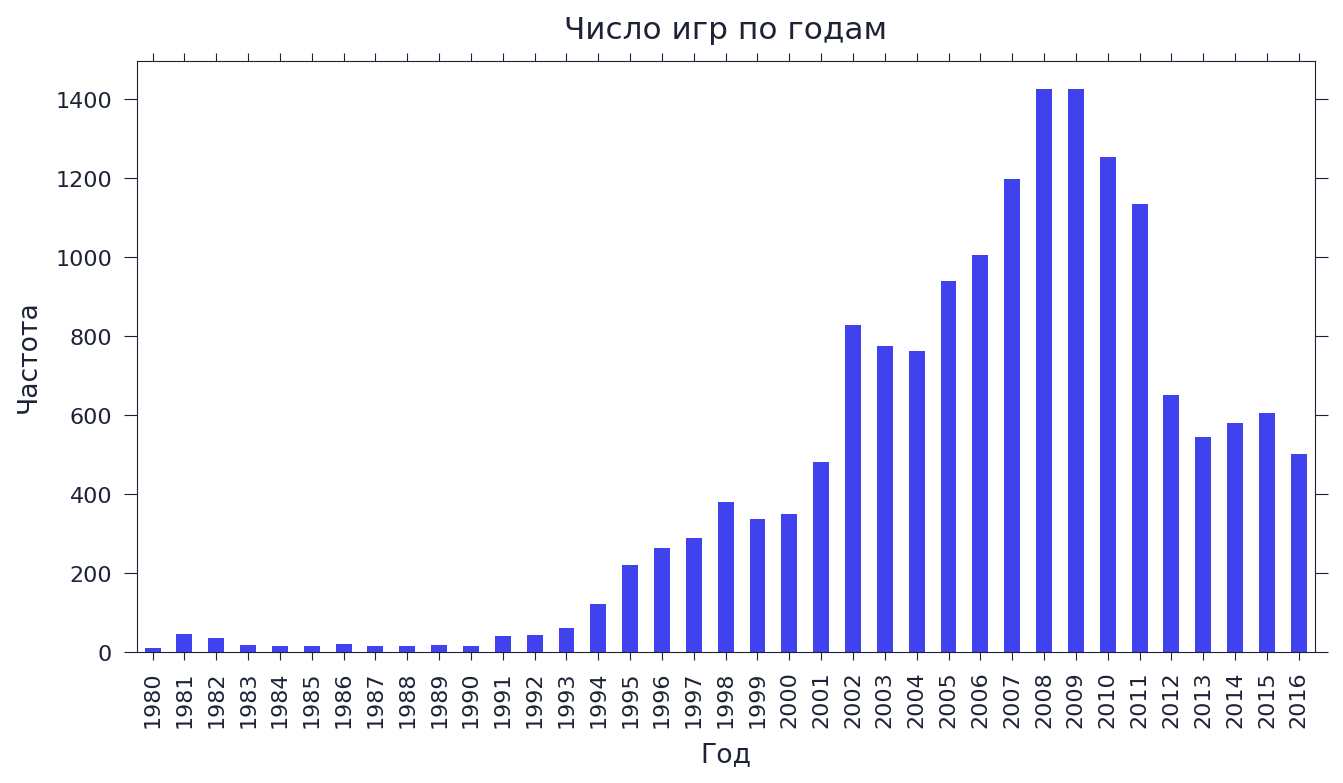

In [23]:
(df.year_of_release.value_counts()
 .sort_index()
 .plot(kind='bar', xlabel='Год', ylabel='Частота',
       title='Число игр по годам', figsize=(9.5, 4.8)));

Цель, которую необходимо достичь по результатам анализа, — спланировать рекламные кампании для интернет-магазина на 2017 год: это означает, что данные за весь период наблюдений не так важны, а лучше было бы сконцентрироваться на определенном актуальном периоде для дальнейшего прогноза.

Посмотрим, как менялись продажи по платформам. Для начала, выберем платформы с наибольшими суммарными продажами:

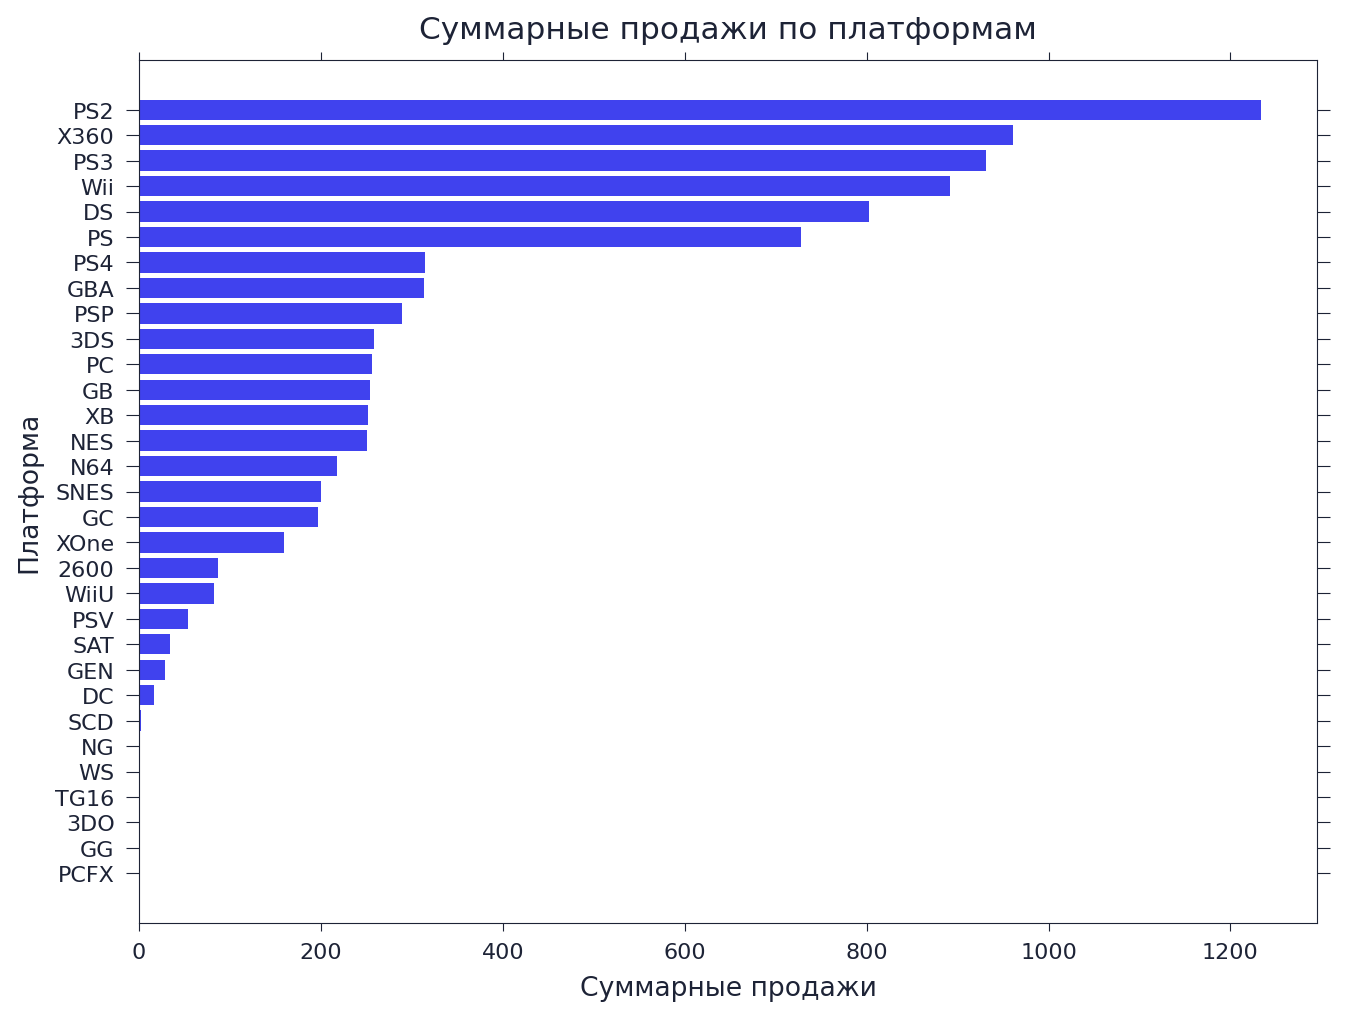

In [24]:
# Построим столбчатую диаграму для разных `platform` по `total_sales`
pivot = (df.pivot_table(index='platform',
                       values='total_sales',
                       aggfunc='sum')
         .reset_index()
         .sort_values(by='total_sales'))

plt.figure(figsize=(9.5, 7))
plt.barh(y=pivot.platform, width=pivot.total_sales)
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа')
plt.title('Суммарные продажи по платформам');

Выделим 6 платформ с наибольшими общими продажами: PS2, X360, PS3, Wii, DS и PS; продажи для следующей за PS платформой — GBA — уменьшаются по сравнению с PS более чем на 50%.

Построим, как менялись продажи по выбранным платфомам по годам:

In [25]:
# код ревьюера
df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).head(6).index.to_list()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

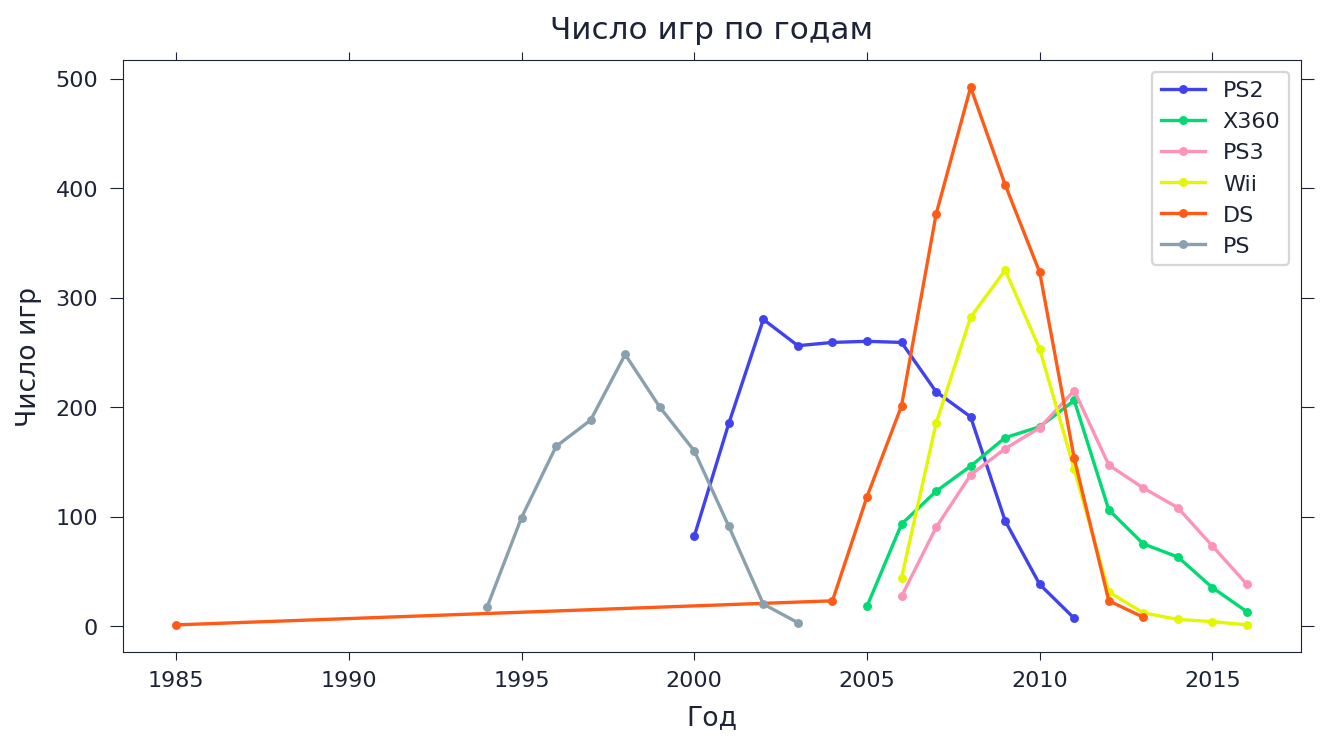

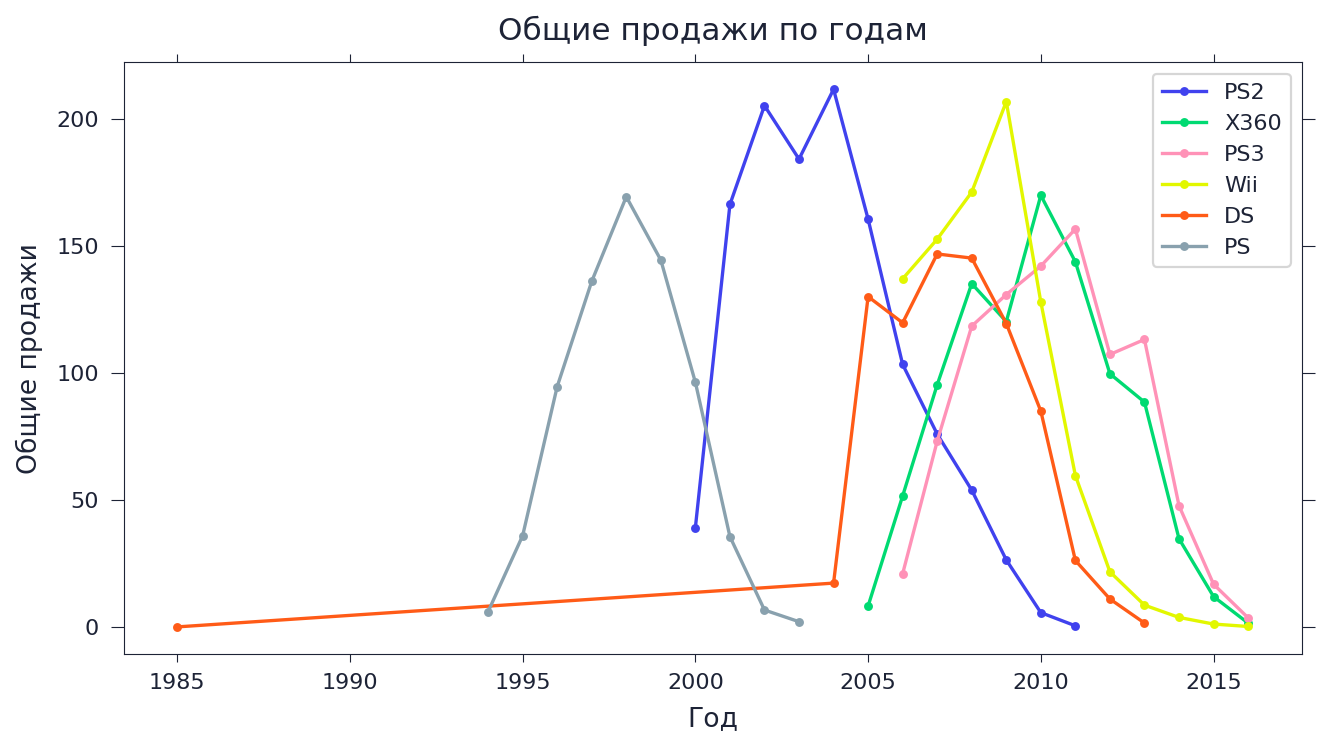

In [26]:
# Как менялось число игр по годам
top_platforms = (df.groupby('platform').agg({'total_sales': 'sum'})
                 .sort_values(by='total_sales', ascending=False)
                 .head(6).index.to_list())

for pltf in top_platforms:
    (df[df.platform == pltf]
     .year_of_release
     .value_counts()
     .sort_index()
     .plot(marker='.', label=pltf, figsize=(9.5, 4.8)))
plt.legend()
plt.xlabel('Год')
plt.ylabel('Число игр')
plt.title('Число игр по годам');

# Как менялись продажи по годам
pivot = (df.query('platform in @top_platforms')
         .pivot_table(index=['platform', 'year_of_release'],
                      values='total_sales',
                      aggfunc='sum'))
pivot = pivot.reset_index()

plt.figure(figsize=(9.5, 4.8))
for pltf in top_platforms:
    plt.plot(pivot[pivot.platform == pltf].year_of_release,
             pivot[pivot.platform == pltf].total_sales, '.-', label=pltf)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Общие продажи по годам');

Наблюдение, включающее платформу DS в 1985 г., выглядит как ошибка:

In [27]:
df.query('year_of_release == 1985 and platform == "DS"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15956,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,<NA>,NaN,0.02


В соответствии с [информацией](https://www.suruga-ya.com/en/product/176000588), релиз игры состоялся в 2007 г. Заменим значение и построим графики заново:

In [28]:
# Заменяем значение
df.loc[df.name == 'Strongest Tokyo University Shogi DS', 'year_of_release'] = 2007
df[df.name == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15956,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,<NA>,<NA>,NaN,0.02


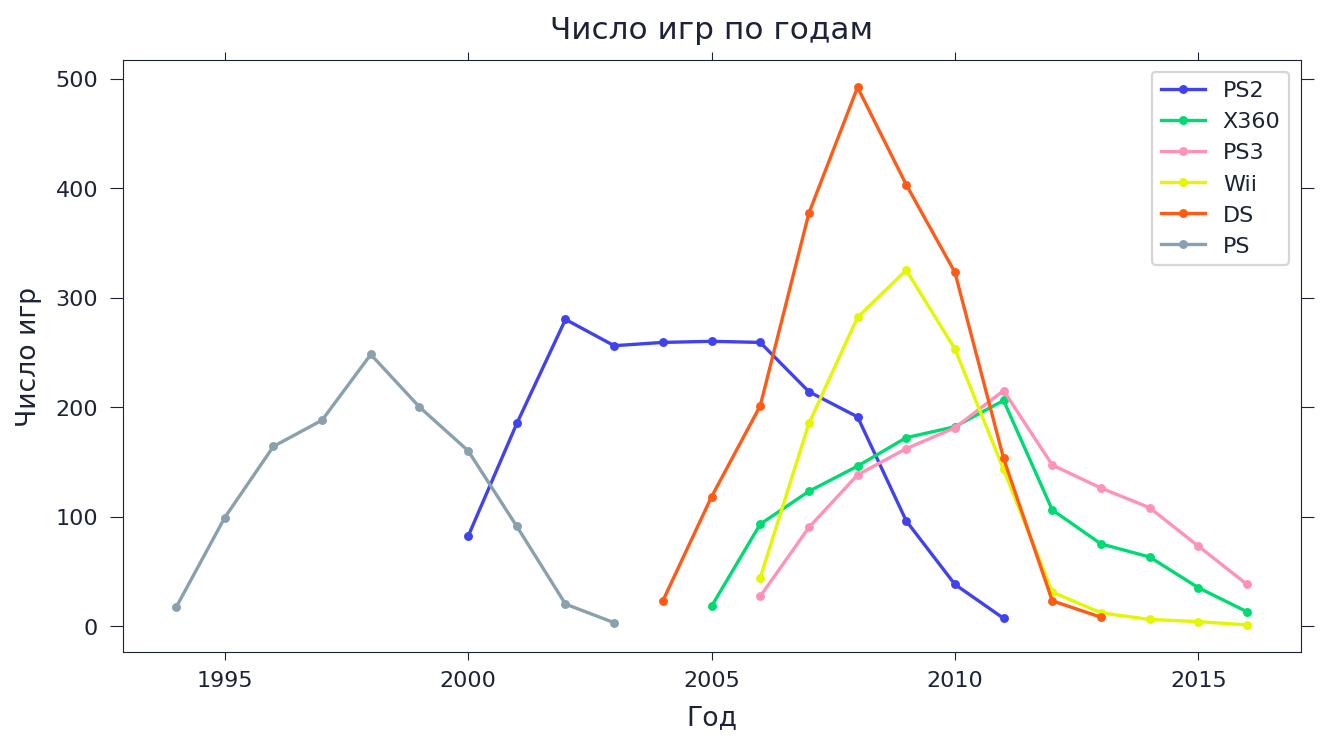

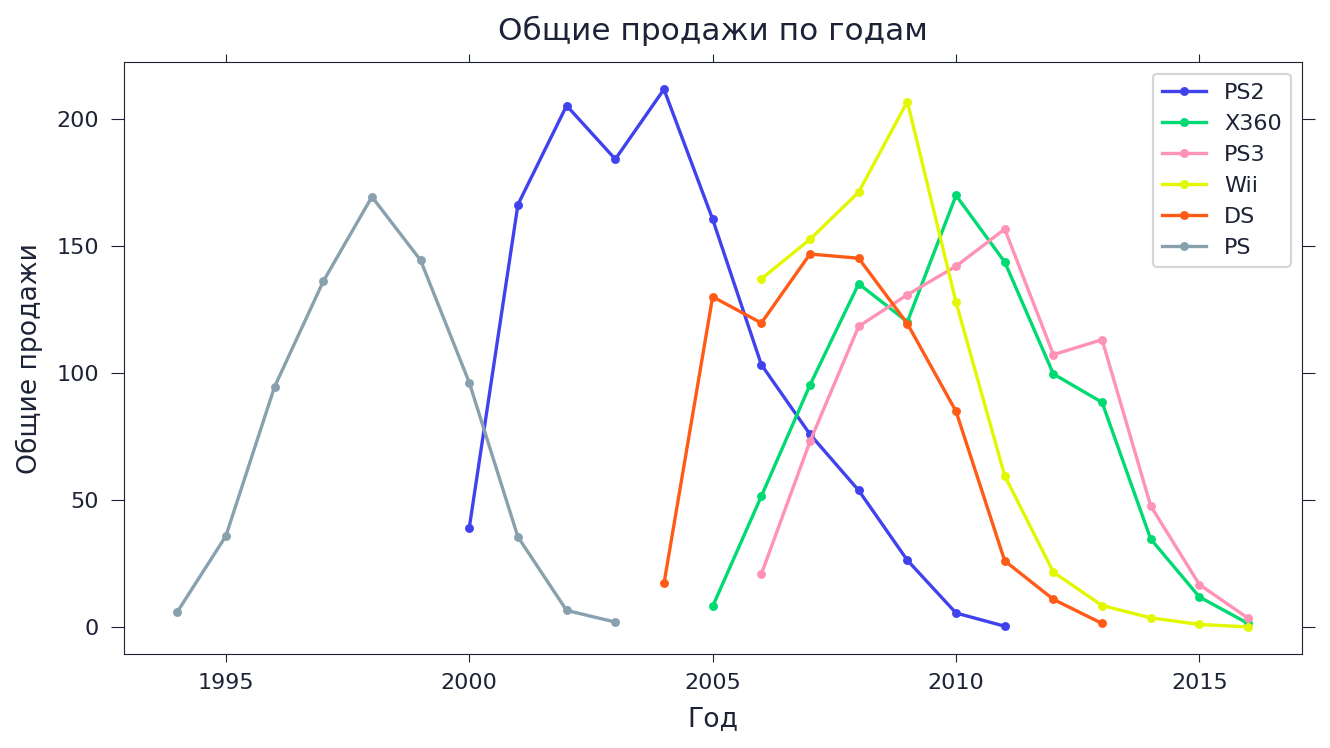

In [29]:
# Построим графики заново
for pltf in top_platforms:
    (df[df.platform == pltf]
     .year_of_release
     .value_counts()
     .sort_index()
     .plot(marker='.', label=pltf, figsize=(9.5, 4.8)))
plt.legend()
plt.xlabel('Год')
plt.ylabel('Число игр')
plt.title('Число игр по годам');

# Как менялись продажи по годам
pivot = (df.query('platform in @top_platforms')
         .pivot_table(index=['platform', 'year_of_release'],
                      values='total_sales',
                      aggfunc='sum'))
pivot = pivot.reset_index()

plt.figure(figsize=(9.5, 4.8))
for pltf in top_platforms:
    plt.plot(pivot[pivot.platform == pltf].year_of_release,
             pivot[pivot.platform == pltf].total_sales, '.-', label=pltf)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Общие продажи по годам');

Построенные графики позволяют выявить следующие закономерности в процессе развития той или иной платформы:
* Платформа появляется и ее первоначальные общие продажи близки к 0;
* Через некоторый промежуток времени, равный, в среднем, 4.2 годам, число продаж достигает максимального значения;
* Затем продажи начинают снижаться и через некоторый промежуток времени, равный, в среднем, 5.8 годам, число продаж достигает минимального значения.

Таким образом, характерный срок, за который появляются новые и исчерзают старые платформы, равняется, в среднем, 10 годам.

Кроме того, из полученных графиков можно сделать вывод, что все из выделенных платформ с наибольшими продажами на момент 2016 года находятся в состоянии упадка: по этой причине, очевидно, было бы целесообразно в качестве потенциального популярного продукта выбрать игры той платформы, которая:
1. Уже является достаточно успешной;
2. На период 2015-2016 гг. характеризуется ростом общих продаж.

Получим примерный срок жизни платформы с помощью расчетов:

In [30]:
duration = df.groupby('platform')['year_of_release'].nunique().mean()
print(f'Средний срок жизни платформы: {duration:.2f} лет')

Средний срок жизни платформы: 7.65 лет


In [31]:
# код ревьюера
df.groupby('platform')['year_of_release'].nunique().mean()

7.645161290322581

### 3.2. Выбор потенциальных платформ
<a class="anchor" id="3.2"></a>

Далее будем рассматривать только данные за актуальный период: в качестве акутального было бы целесообразно выбрать период, равный 2/3 характерного срока, за который появляются новые и исчерзают старые платформы, — т. е. 5 лет.

Таким образом, актуальный период — период с 2012 по 2016 год:
1. В соответствии со столбчатой диаграммой для числа игр по годам число выпускаемых игр в 2012 году значительно уменьшилось по сравнению с 2013: можно сказать, что выбранный актуальный период отличается от предыдущих;
2. Выбор такого актуального периода позволит обратить внимание на те платформы, которые уже являются достаточно успешными, и, в то же время, еще не достигли этапа спада продаж.

Создадим новый датафрейм `df_act` с данными за выбранный актуальный период и посмотрим основную информацию по нему:

In [32]:
df_act = df[df.year_of_release >= 2012]
get_inf(df_act)
print(f'Число уникальных платформ за актуальный период: {len(df_act.platform.unique())}')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,82,M,21.049999
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,81,M,16.270000
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,<NA>,NaN,14.630000
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,<NA>,NaN,14.599999
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,53,M,13.789999


<class 'pandas.core.frame.DataFrame'>
Index: 2885 entries, 16 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   Int16  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float32
 5   eu_sales         2885 non-null   float32
 6   jp_sales         2885 non-null   float32
 7   other_sales      2885 non-null   float32
 8   critic_score     1311 non-null   Int16  
 9   user_score       1530 non-null   Int16  
 10  rating           1610 non-null   object 
 11  total_sales      2885 non-null   float32
dtypes: Int16(3), float32(5), object(4)
memory usage: 194.4+ KB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2885.0,2885.000000,2885.000000,2885.000000,2885.000000,1311.0,1530.0,2885.000000
mean,2013.917504,0.204842,0.175671,0.066752,0.054128,72.250191,66.368627,0.501393
std,1.411559,0.566781,0.505424,0.241614,0.164664,12.688455,15.692768,1.249341
min,2012.0,0.000000,0.000000,0.000000,0.000000,13.0,2.0,0.010000
25%,2013.0,0.000000,0.000000,0.000000,0.000000,66.0,58.0,0.040000
50%,2014.0,0.030000,0.030000,0.010000,0.010000,74.0,70.0,0.120000
75%,2015.0,0.170000,0.140000,0.050000,0.040000,81.0,78.0,0.430000
max,2016.0,9.660000,9.090000,4.390000,3.960000,97.0,93.0,21.049999


Число пропусков: 
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1574
user_score         1355
rating             1275
total_sales           0
dtype: int64

Число уникальных платформ за актуальный период: 11


Таким образом, новый датафрейм содержит 2 886 наблюдений; число уникальнх платформ за актуальный период составляет 11 штук.

Посмотрим, какие из платформ лидирую по продажам, растут или падают. Построим столбчатую диаграмму для суммарных продаж для доступных платформ:

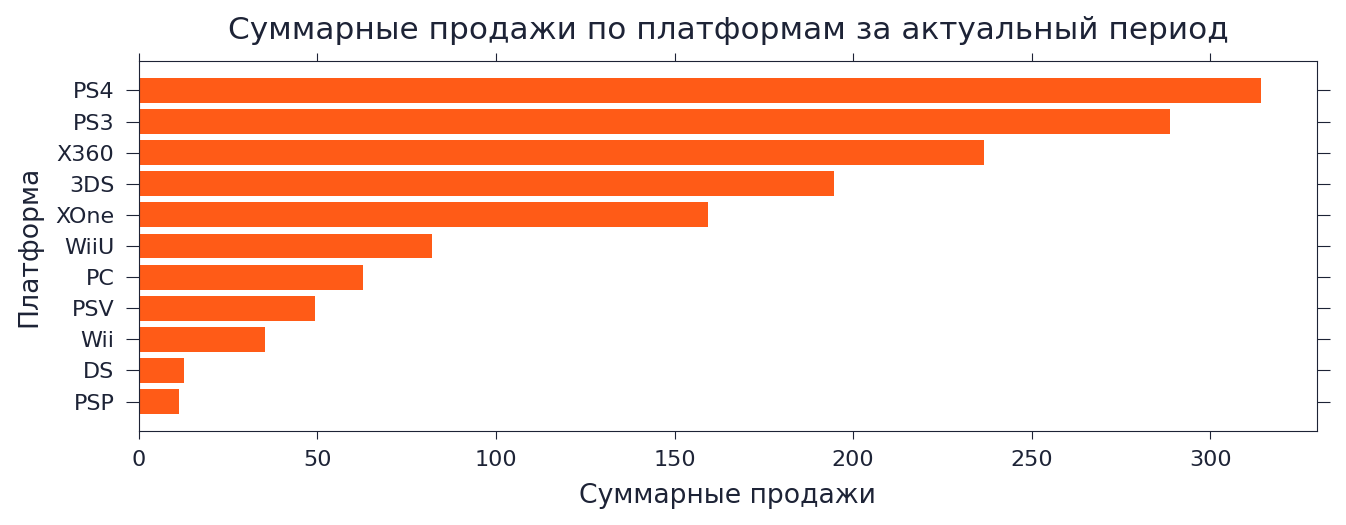

In [33]:
# Построим столбчатую диаграму для разных `platform` по `total_sales`
pivot = (df_act.pivot_table(index='platform',
                            values='total_sales',
                            aggfunc='sum')
         .reset_index()
         .sort_values(by='total_sales'))

plt.figure(figsize=(9.5, 3))
plt.barh(y=pivot.platform, width=pivot.total_sales, color='#FF5B17')
plt.xlabel('Суммарные продажи')
plt.ylabel('Платформа')
plt.title('Суммарные продажи по платформам за актуальный период');

Платформы можно разделить на две группы в зависимости за суммарные продажи за актуальный период:
1. Платформы с высокими продажами: PS4, PS3, X360, 3DS и XOne.
   * Платформы PS3 и X360 уже рассматривались на предыдущем шаге: линейный график для общих продаж по годам показал, что эти платформы уже прошли период своего пика;
   * Можно предположить, что платформа XOne пришла на смену X360 и потенциально станет достаточно популярной;
2. Платформы с низкими продажами: WiiU, PC, PSV, Wii, DS и PSP.
   * Платформа Wii уже рассматривалась ранее: линейный график для общих продаж по годам показал, что она уже прошла период своего пика;
   * Можно предположить, что платформа WiiU пришла на смену Wii и потенциально станет достаточно популярной;
   * Платформа DS также уже рассматривалась ранее: в соответствии с линейным графиком, игры на ней перестали производиться с 2013 года.
  
Посмотрим, как менялись продажи по годам для выделенных групп платформ за актуальный период:

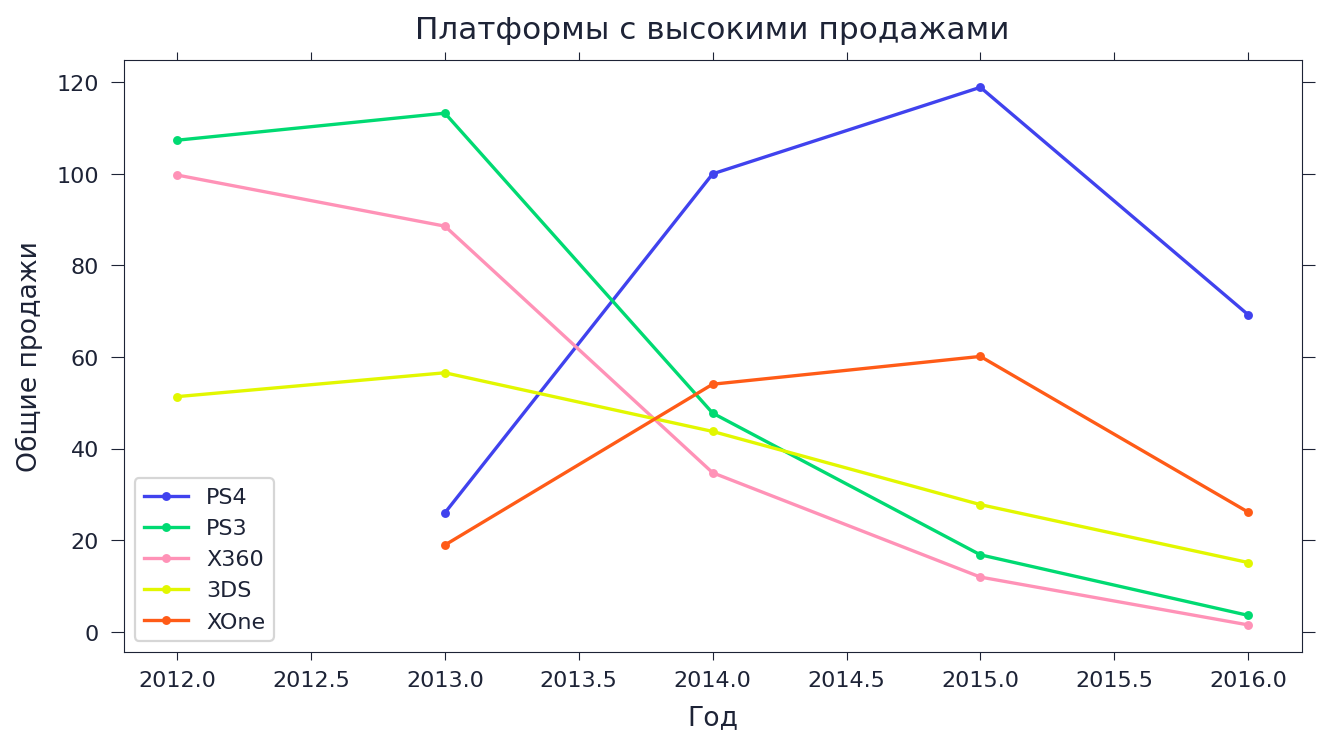

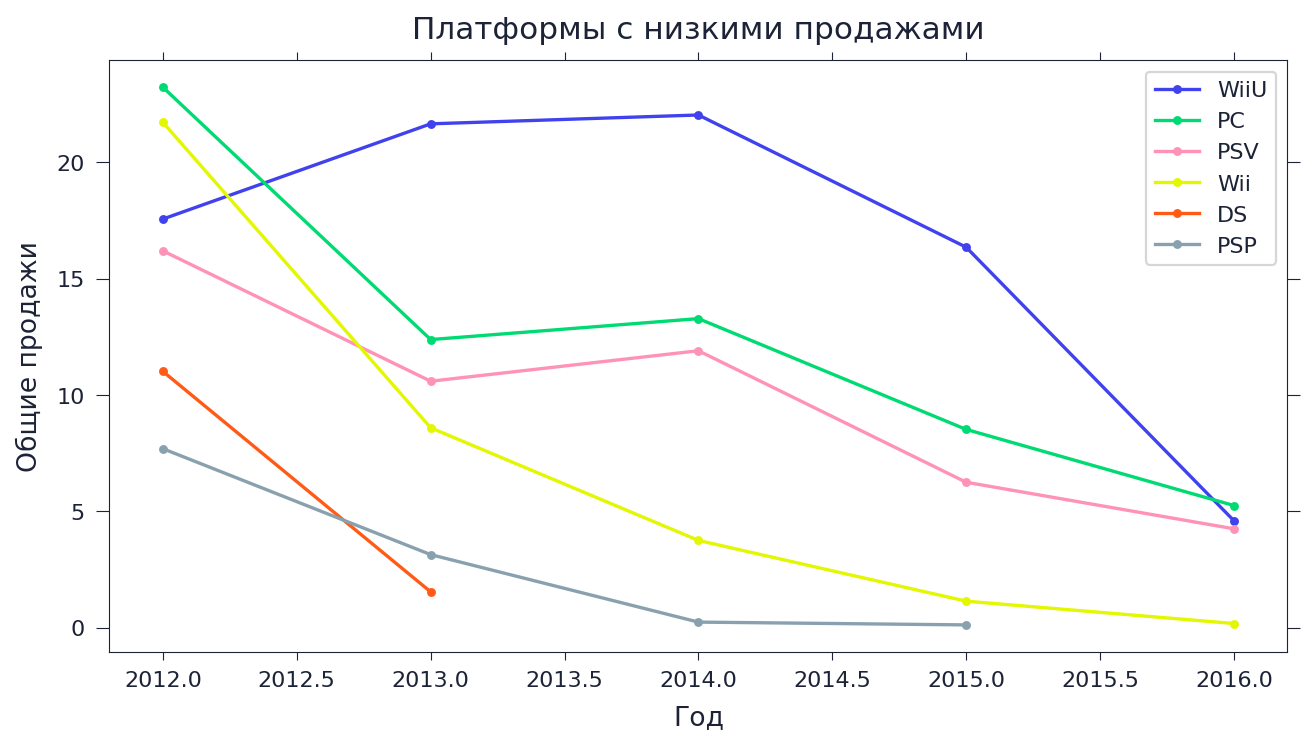

In [34]:
# Платформы с высокими продажами
high_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne']
pivot = (df_act.query('platform in @high_platforms')
         .pivot_table(index=['platform', 'year_of_release'],
                      values='total_sales',
                      aggfunc='sum'))
pivot = pivot.reset_index()

plt.figure(figsize=(9.5, 4.8))
for pltf in high_platforms:
    plt.plot(pivot[pivot.platform == pltf].year_of_release,
             pivot[pivot.platform == pltf].total_sales, '.-', label=pltf)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Платформы с высокими продажами');

# Платформы с низкими продажами
low_platforms = ['WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']
pivot = (df_act.query('platform in @low_platforms')
         .pivot_table(index=['platform', 'year_of_release'],
                      values='total_sales',
                      aggfunc='sum'))
pivot = pivot.reset_index()

plt.figure(figsize=(9.5, 4.8))
for pltf in low_platforms:
    plt.plot(pivot[pivot.platform == pltf].year_of_release,
             pivot[pivot.platform == pltf].total_sales, '.-', label=pltf)
plt.legend()
plt.xlabel('Год')
plt.ylabel('Общие продажи')
plt.title('Платформы с низкими продажами');

На основе линейных графиков можно сделать следующие выводы:
1. Платформы DS и PSP перестали выпускать игры в 2013 и 2015 гг. сооветственно: не будем рассматривать их в качестве потенциально прибыльных платформ;
2. Как было показано ранее, платформы PS3, X360 и Wii находятся на этапе спада и также вряд ли могут рассматриваться как потенциально прибыльные;
3. Среди платформ с низкими продажами фаворитом является WiiU: есть некоторая вероятность, что продукты этой платформы станут популярны в 2017 г.;
4. Определенными фаворитами можно назвать платформы PS4 и XOne, т. к. они отвечают всем указанным ранее требованиям к потенциальной платформе:
   * В настоящее время они уже являются известными: они входят в группу с высокими продажами, которые за актуальный период составляют 314.05 млн копий (PS4) и 159.32 млн копий (XOne);
   * Несмотря на спад за период 2015-2016 гг. (свойственны для всех платформ), за предыдущие периоды для этих платформ был свойственен рост общих продаж;
5. Так или иначе, в целом, продажи по всем платформам за период 2015-2016 гг. снизились: это может быть связано с циклическими трендами в индустрии или, например, с отсутствием крупных релизов.

Таким образом, к потенциально прибыльным платформам следует отнести PS4 (для которой свойтсвенны максимальные продажи за актульаный период) и XOne (и в меньшей степени, возможно, WiiU, которая потенциально может прийти на смену Wii).

### 3.3. Boxplot для общих продаж
<a class="anchor" id="3.3"></a>

Построим боксплот по глобальным продажам игр в разбивке по платформам:

count    2885.000000
mean        0.501393
std         1.249341
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.049999
Name: total_sales, dtype: float64


Игр с продажами более 1.5 млн копий: 7.73%



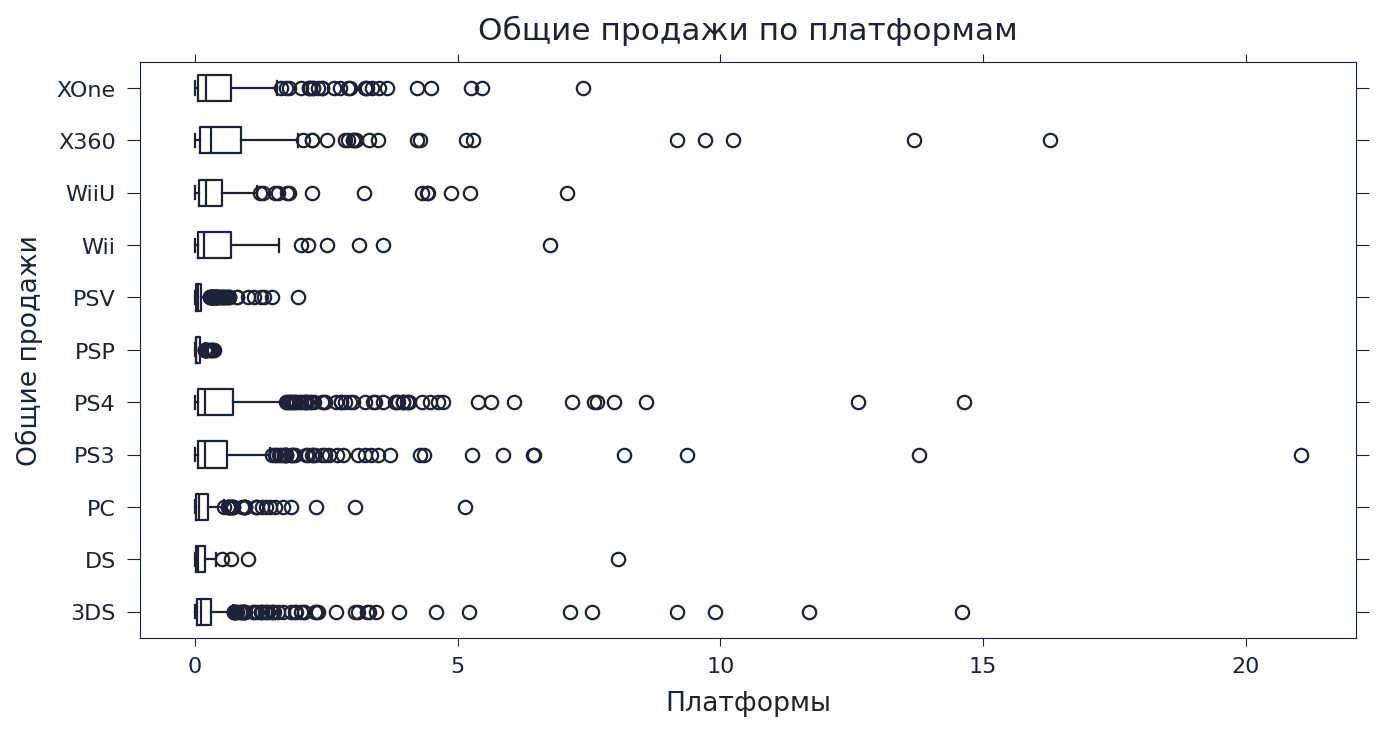

In [35]:
# Получим статистику
display(df_act.total_sales.describe())
print()
print(f'Игр с продажами более 1.5 млн копий: {len(df_act[df_act.total_sales > 1.5]) / len(df_act):.2%}\n')

# Построим боксплоты
df_act.boxplot(column='total_sales', by='platform', color='#1D2336',
               grid=False, vert=False, figsize=(9.5, 4.8))
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.suptitle('')
plt.title('Общие продажи по платформам');

In [36]:
# код ревьюера
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.8.2


Построенные боксплоты отображают следующую закономерность:
* В основном общие продажи для всех платформ, выпускавших игры за актуальный период, редко превышают 1.5 млн копий: таких игр всего 7.73% от общего числа игр;
* Среднее значение общих продаж для всех игр за рассматриваемый период составляет $\bar{x}=0.5$ млн копий, а стандартное отклонение $\text{sd}=1.25$ млн копий; межквартильный размах составляет 0.04 — 0.43 млн копий;
* Только на 4 платформах присутствуют игры с общими продажами более 10 млн копий: к ним относятся X360, PS4, PS3 и 3DS, а всего таких игр — 9 штук, т. е. всего 0.31% от общего числа игр;
* Наличие PS4 среди указанных платформ еще раз подтверждает ее надежность в качестве потенциально прибыльной.

### 3.4. Влияние отзывов на продажи
<a class="anchor" id="3.4"></a>

Посмотрим, как влияют отзывы пользователей и критиков на продажи для одной популярной платформы: выберем для этого PS4, для которой свойственны наибольшие продажи за актуальный период.

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

Коэффициент корреляции между отзывами критиков и продажами: 0.370
Коэффициент корреляции между отзывами пользователей и продажами: -0.030

Статистика по отзывам критиков:
count        252.0
mean      72.09127
std      12.485992
min           19.0
25%           66.0
50%           73.0
75%           80.0
max           97.0
Name: critic_score, dtype: Float64

Статистика по отзывам пользователей:
count       257.0
mean     67.48249
std      14.59481
min          15.0
25%          61.0
50%          70.0
75%          78.0
max          92.0
Name: user_score, dtype: Float64



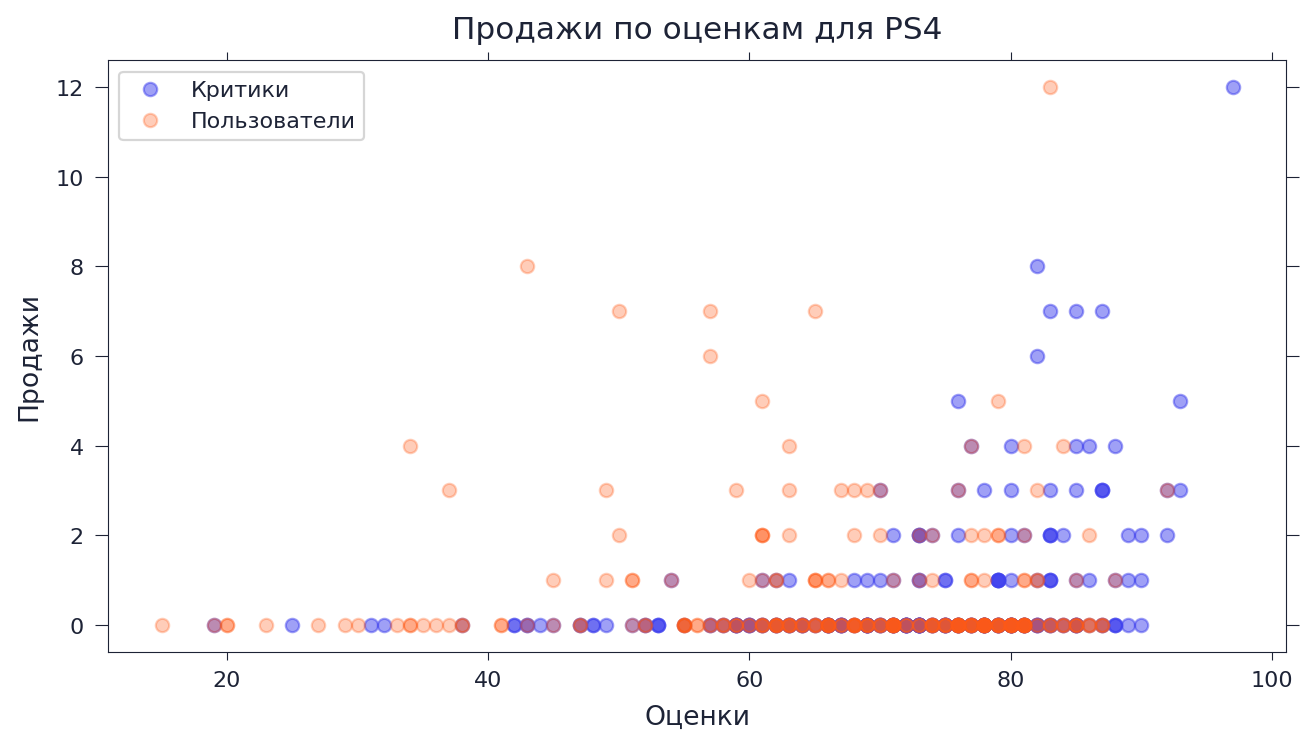

In [37]:
# Посчитаем коэффициенты корреляции
df_critic = df_act[~(df_act.critic_score.isna())]
df_critic = df_critic[df_critic.platform == 'PS4']
corr = df_critic['total_sales'].astype(int).corr(df_critic['critic_score'].astype(int))
print(f'Коэффициент корреляции между отзывами критиков и продажами: {corr:.3f}')

df_user = df_act[~(df_act.user_score.isna())]
df_user = df_user[df_user.platform == 'PS4']
corr = df_user['total_sales'].astype(int).corr(df_user['user_score'].astype(int))
print(f'Коэффициент корреляции между отзывами пользователей и продажами: {corr:.3f}\n')

print(f'Статистика по отзывам критиков:\n{df_critic.critic_score.describe()}\n')
print(f'Статистика по отзывам пользователей:\n{df_user.user_score.describe()}\n')

# Построим scatter plot
plt.figure(figsize=(9.5, 4.8))
plt.plot(df_critic.critic_score.astype(int), df_critic.total_sales.astype(int), 
         'o', label='Критики', alpha=0.5)
plt.plot(df_user.user_score.astype(int), df_user.total_sales.astype(int), 
         'o', label='Пользователи', alpha=0.3, color='#FF5B17')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.legend()
plt.title('Продажи по оценкам для PS4');

На основе полученной диаграммы рассеяния можно сделать следующие выводы:
1. Критики, как правило, оценивают игры выше, чем пользователи: средние значения составляют $\bar{x}_{\text{critic}}=72.1, \ \bar{x}_{\text{user}}=67.5$; кроме того, оценки пользователей являются и более вариативными со стандартными отклонениями $\text{sd}_{\text{critic}}=12.5, \ \text{sd}_{\text{user}}=14.6$;
2. С другой стороны, пользователи чаще ставят высокие оценки играм, которые не отличаются высокими продажами: это подтверждается и значениями коэффициентов корреляции $\text{Corr}_{\text{critic}}=0.407, \ \text{Corr}_{\text{user}}=-0.032$;
3. Таким образом, высокие оценки критиков (в отличие от оценок пользователей) могут свидетельствовать о потенциальной прибыльности той или иной платформы. 

Соотнесем выводы с продажами игр на других платформах — аналогично посчитаем коэффициенты корреляции и построим диаграмму рассеяния:

Коэффициент корреляции между отзывами критиков и продажами: 0.271
Коэффициент корреляции между отзывами пользователей и продажами: 0.000

Статистика по отзывам критиков:
count       1311.0
mean     72.250191
std      12.688455
min           13.0
25%           66.0
50%           74.0
75%           81.0
max           97.0
Name: critic_score, dtype: Float64

Статистика по отзывам пользователей:
count       1530.0
mean     66.368627
std      15.692768
min            2.0
25%           58.0
50%           70.0
75%           78.0
max           93.0
Name: user_score, dtype: Float64



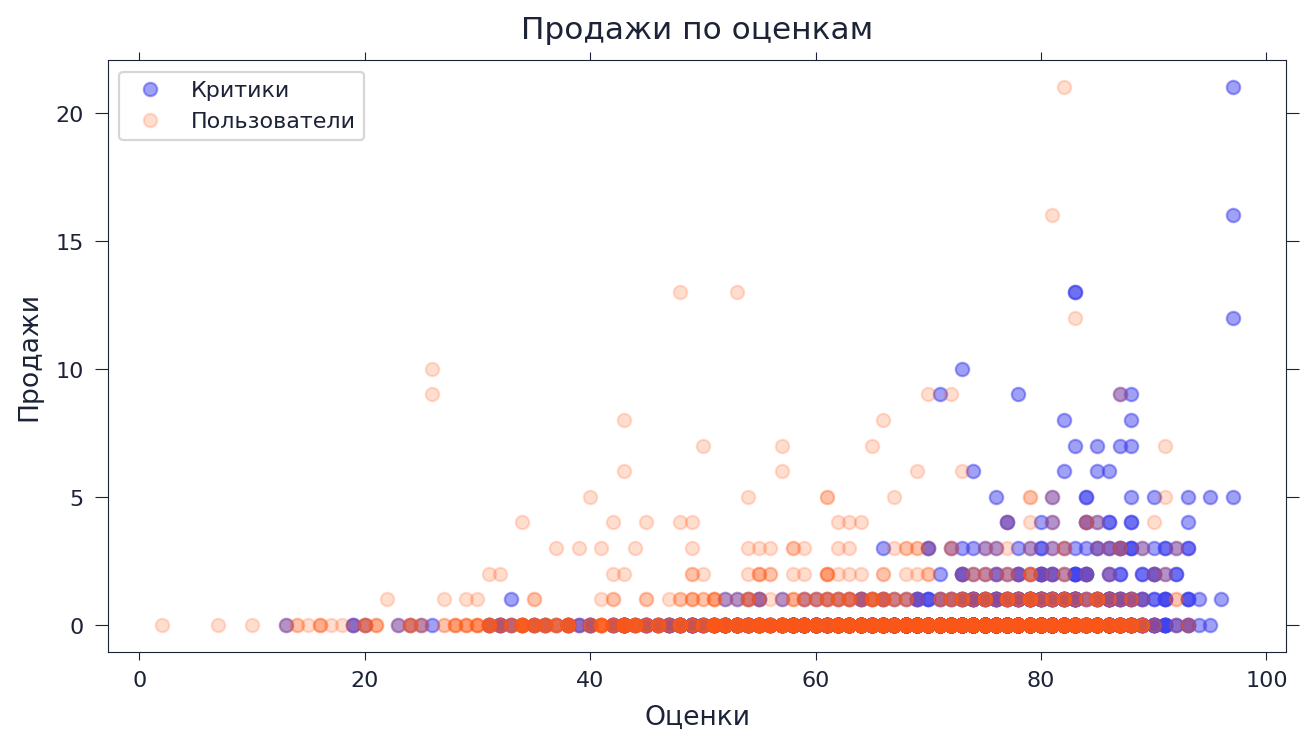

In [38]:
# Посчитаем коэффициенты корреляции
df_critic = df_act[~(df_act.critic_score.isna())]
corr = df_critic['total_sales'].astype(int).corr(df_critic['critic_score'].astype(int))
print(f'Коэффициент корреляции между отзывами критиков и продажами: {corr:.3f}')

df_user = df_act[~(df_act.user_score.isna())]
corr = df_user['total_sales'].astype(int).corr(df_user['user_score'].astype(int))
print(f'Коэффициент корреляции между отзывами пользователей и продажами: {corr:.3f}\n')

print(f'Статистика по отзывам критиков:\n{df_critic.critic_score.describe()}\n')
print(f'Статистика по отзывам пользователей:\n{df_user.user_score.describe()}\n')

# Построим scatter plot
plt.figure(figsize=(9.5, 4.8))
plt.plot(df_critic.critic_score.astype(int), df_critic.total_sales.astype(int), 
         'o', label='Критики', alpha=0.5)
plt.plot(df_user.user_score.astype(int), df_user.total_sales.astype(int), 
         'o', label='Пользователи', alpha=0.2, color='#FF5B17')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.legend()
plt.title('Продажи по оценкам');

Диаграмма рассеяния и рассчитанные коэффициенты корреляции $(\text{Corr}_{\text{critic}}=0.308, \ \text{Corr}_{\text{user}}=0.004)$ показывают, что выводы, сделанные на основе анализа платформы PS4, в целом, справедливы и для других платформ.

Чтобы сделать вывод о зависимости продаж от оценок, также рассмотрим платформы PS3, X360 и 3DS подобным образом:

Коэффициент корреляции для PS3 (критики): 0.287
Коэффициент корреляции для PS3 (пользователи): -0.018



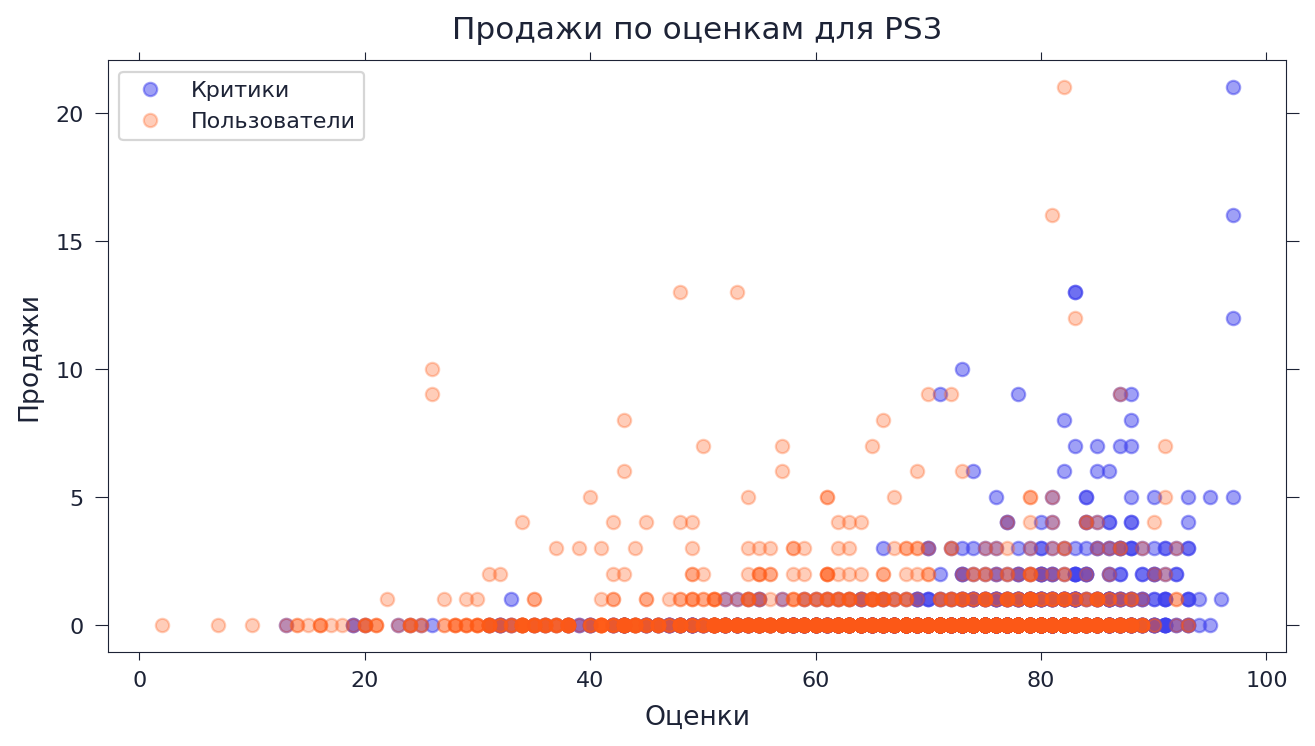

Коэффициент корреляции для X360 (критики): 0.318
Коэффициент корреляции для X360 (пользователи): -0.011



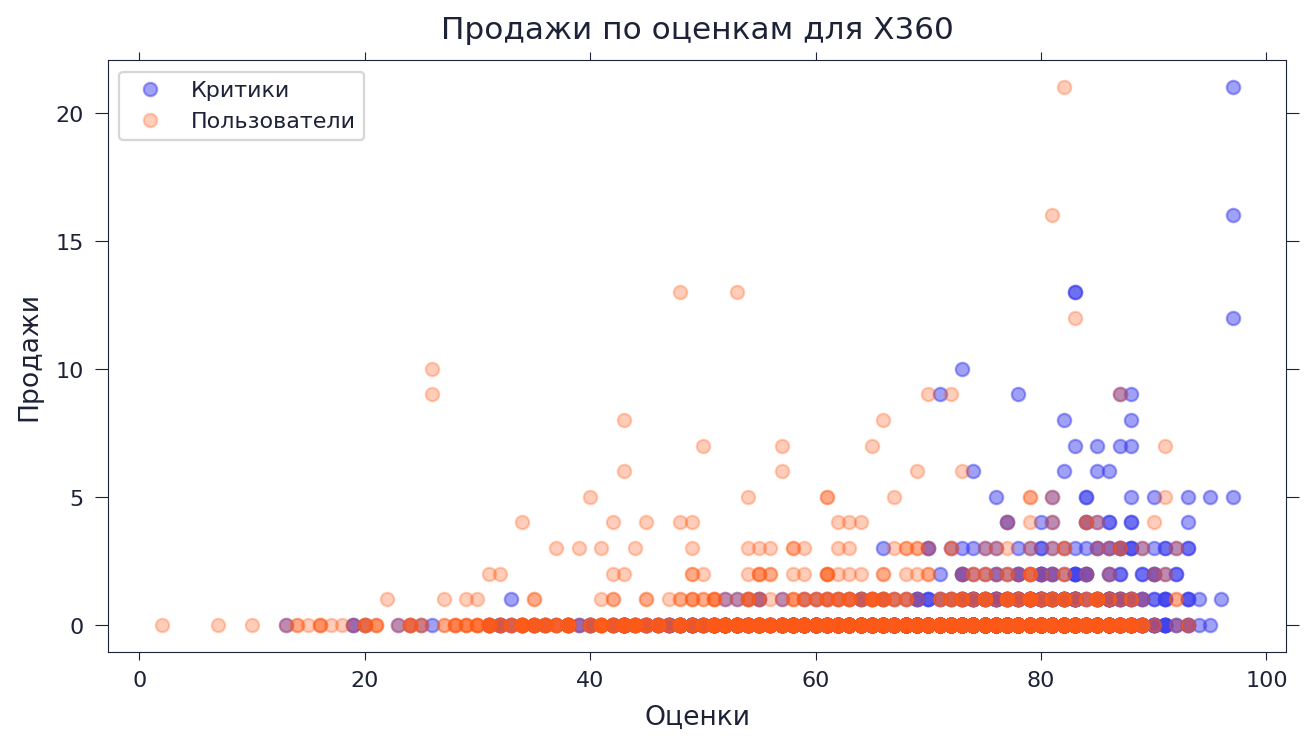

Коэффициент корреляции для 3DS (критики): 0.286
Коэффициент корреляции для 3DS (пользователи): 0.192



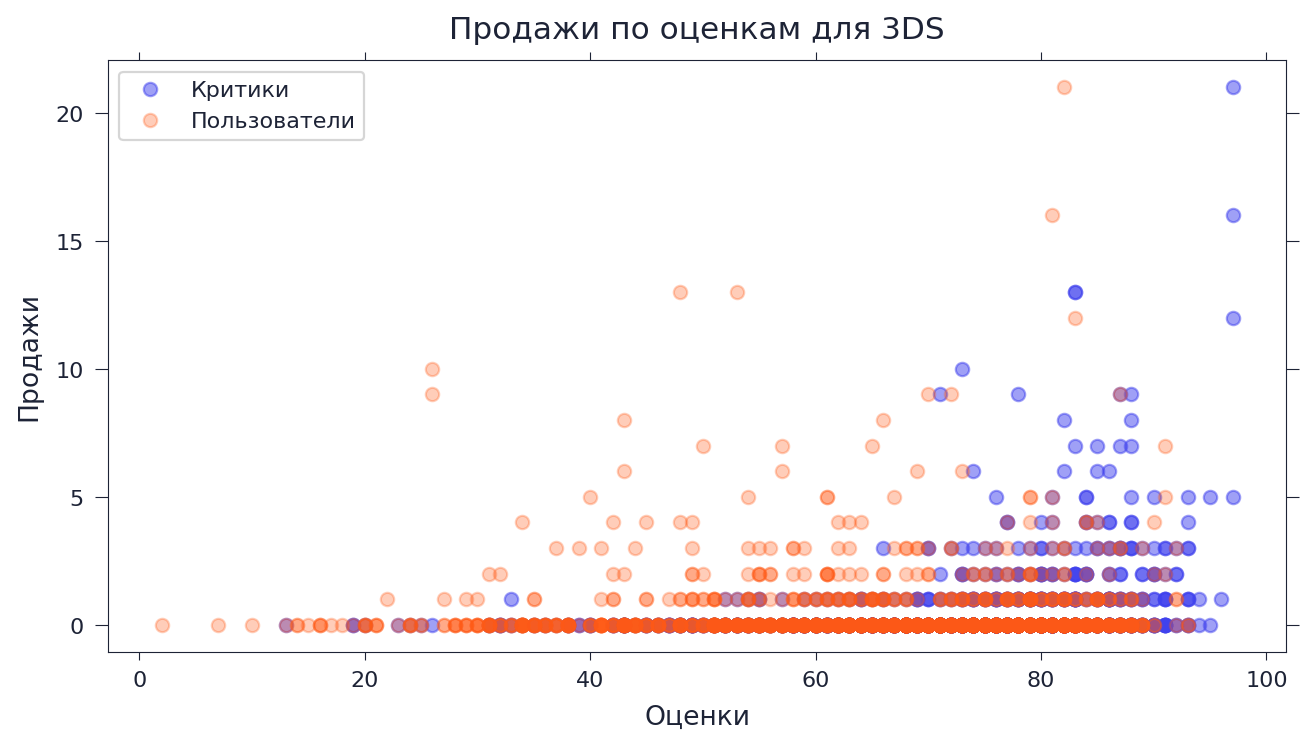

In [39]:
df_critic = df_act[~(df_act.critic_score.isna())]
df_user = df_act[~(df_act.user_score.isna())]
platforms = ['PS3', 'X360', '3DS']

def get_correlation(platforms):
    '''
    Функция принимает список платформ и возвращает
    диаграммы рассеяния и коэффициенты корреляции
    '''
    for pltf in platforms:
        
        df_criticc = df_critic[df_critic.platform == pltf]
        corr = df_criticc['total_sales'].astype(int).corr(df_criticc['critic_score'].astype(int))
        print(f'Коэффициент корреляции для {pltf} (критики): {corr:.3f}')

        df_userr = df_user[df_user.platform == pltf]
        corr = df_userr['total_sales'].astype(int).corr(df_userr['user_score'].astype(int))
        print(f'Коэффициент корреляции для {pltf} (пользователи): {corr:.3f}\n')
        
        plt.figure(figsize=(9.5, 4.8))
        plt.plot(df_critic.critic_score.astype(int), df_critic.total_sales.astype(int), 
                 'o', label='Критики', alpha=0.5)
        plt.plot(df_user.user_score.astype(int), df_user.total_sales.astype(int), 
                 'o', label='Пользователи', alpha=0.3, color='#FF5B17')
        plt.xlabel('Оценки')
        plt.ylabel('Продажи')
        plt.legend()
        plt.title(f'Продажи по оценкам для {pltf}')
        plt.show()

get_correlation(platforms)

Построенные диаграммы рассеяния, а также оэффициенты корреляции, показывают, что выводы, сделанные на основе анализа платформы PS4, в целом, справедливы и для других платформ.

### 3.5. Распределение игр по жанрам
<a class="anchor" id="3.5"></a>

Посмотрим на общее распределение игр по жанрам:

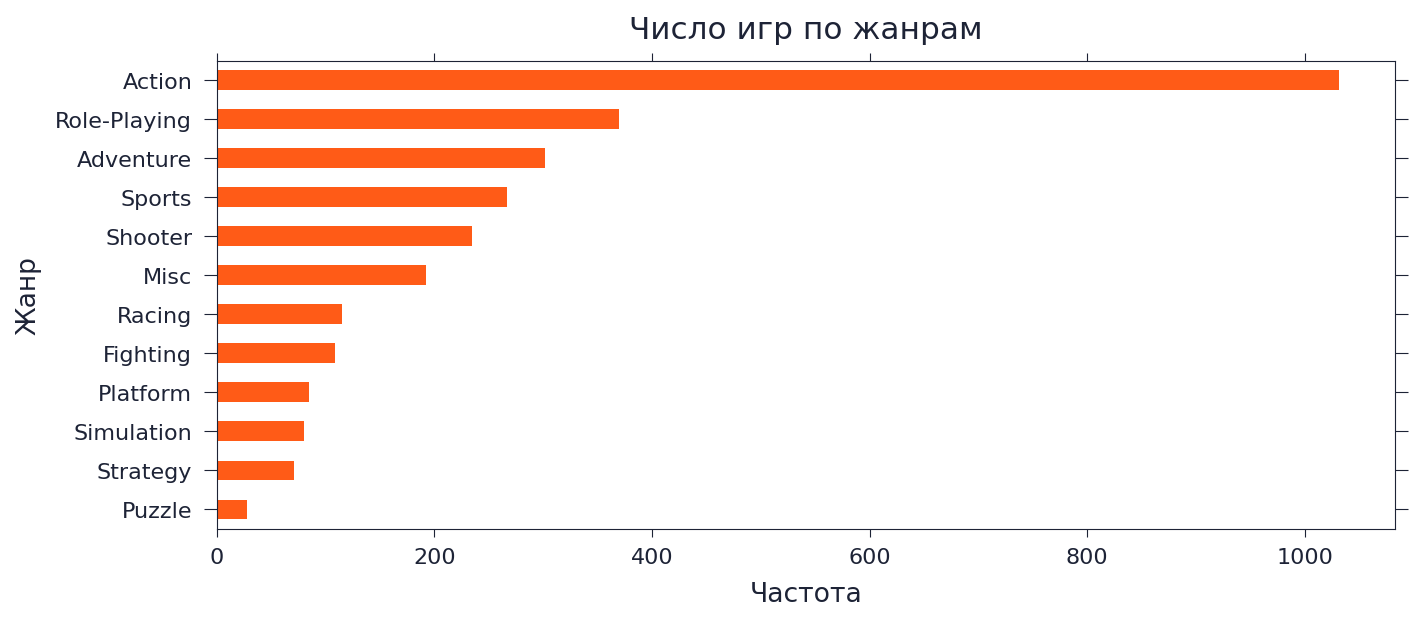

In [40]:
(df_act.genre
 .value_counts(ascending=True)
 .plot.barh(color='#FF5B17', figsize=(9.5, 3.8),
            xlabel='Частота', ylabel='Жанр'))
plt.title('Число игр по жанрам');

Из столбчатой диаграммы видно, что наиболее популярным жанром является Action: число игр этого жанра в 2.8 раа превосходит число игр следующего по популярности жанра — Role-Playing. Меньше всего игр — с жанром Puzzle.

Оценим прибыльность жанров:

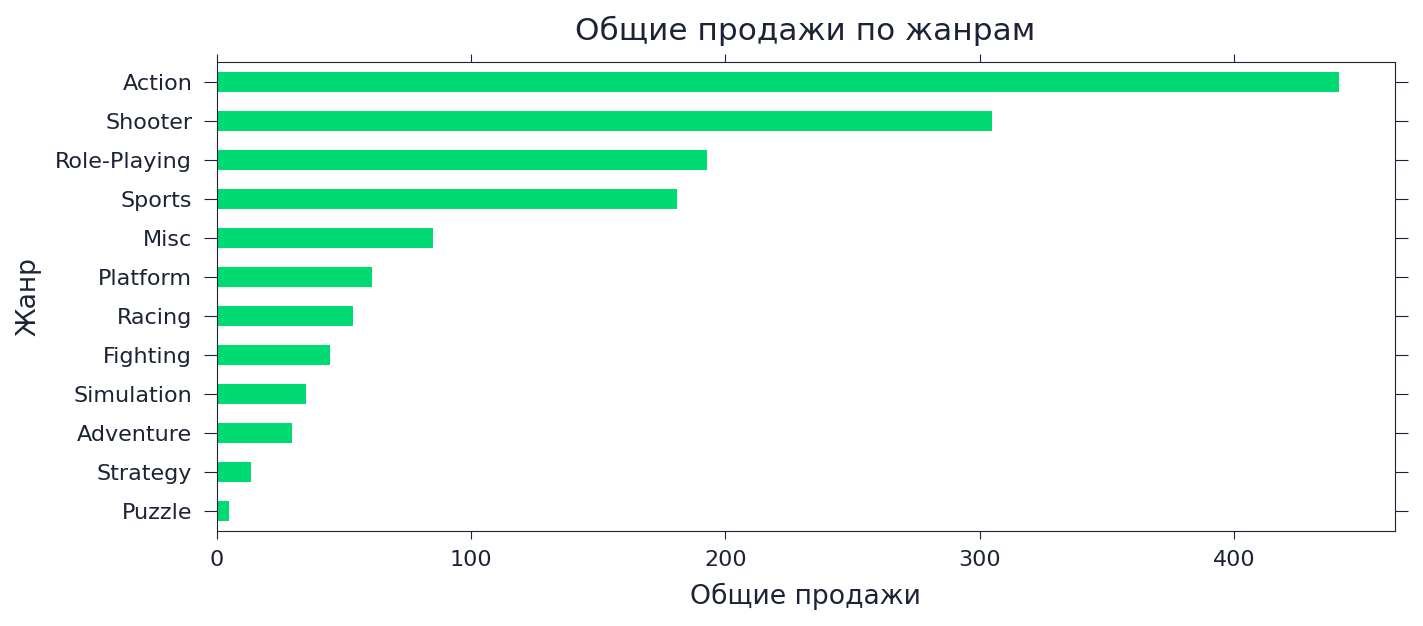

In [41]:
(df_act.pivot_table(index='genre', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=True)
 .plot.barh(color='#00DA72', figsize=(9.5, 3.8),
            xlabel='Общие продажи', ylabel='Жанр'))
plt.legend().remove()
plt.title('Общие продажи по жанрам');

Расстановка жанров по прибыльности немного отличается от полученной ранее (по числу игр). Можно выделить четыре наиболее коммерчески успешных жанра:
* Наиболее прибыльный жанр — Action: продажи составляют 30.5% от общих продаж;
* На втором месте — Shooter: несмотря на то, что число игр этого жанра составляет около 8%, продажи могут сравнить с продажами жанра Action и составляют около 21%: очевидно, среди игр этого жанра много коммерчески успешных;
* Далее следуют жанры Role-Playing и Sports с долей от общих продаж 13.3% и 12.5% соответственно.

Оставшиеся 8 жанров, к которым относятся Misc, Platform, Racing, Fighting, Simulation, Adventure, Strategy и Puzzle являются куда менее прибыльными: причем жанр Adventure с достаточно большим числом игр (более 300) имеет удивительно низкие продажи — около 2.1% от общего числа.

### 3.6. Выводы
<a class="anchor" id="3.6"></a>

На данном шаге был проведен исследовательский анализ данных. Были выделены 6 платформ с наибольшими общими продажами: PS2, X360, PS3, Wii, DS и PS; и на основе анализа суммарных продаж по годам были получены следующие результаты:
1. Характерный срок, за который появляются новые и исчерзают старые платформы, равняется, в среднем, 10 годам;
2. Все из выделенных платформ с наибольшими продажами на момент 2016 года находятся в состоянии упадка: по этой причине, очевидно, было бы целесообразно в качестве потенциального популярного продукта выбрать игры той платформы, которая:
    * Уже является достаточно успешной;
    * На период 2015-2016 гг. характеризуется ростом общих продаж.
  
Цель, которую необходимо достичь по результатам анализа, — спланировать рекламные кампании для интернет-магазина на 2017 год: это означает, что данные за весь период наблюдений не так важны, а лучше было бы сконцентрироваться на определенном актуальном периоде для дальнейшего прогноза. В качестве актуального был выбран период с 2012 по 2016 год: выбор такого актуального периода позволит обратить внимание на те платформы, которые уже являются достаточно успешными, и, в то же время, еще не достигли этапа спада продаж.

На основе линейных графиков для платформ за выбранный актуальный период были сделаны прогнозы о потенциально прибыльных платформах: к ним относятся
1. В первую очередь, PS4 и XOne, появившиеся сравнительно недавно, и для которых уже свойственны высокие продажи;
2. Во вторую очередь, WiiU, которая потенциально может прийти на смену платформе Wii.

Были построены боксплоты для общих продаж игр в разбивке по платформам:
* В основном общие продажи для всех платформ, выпускавших игры за актуальный период, редко превышают 1.5 млн копий: таких игр всего 7.73% от общего числа игр;
* Среднее значение общих продаж для всех игр за рассматриваемый период составляет $\bar{x}=0.5$ млн копий, а стандартное отклонение $\text{sd}=1.25$ млн копий; межквартильный размах составляет 0.04 — 0.43 млн копий;
* Только на 4 платформах присутствуют игры с общими продажами более 10 млн копий: к ним относятся X360, PS4, PS3 и 3DS, а всего таких игр — 9 штук, т. е. всего 0.31% от общего числа игр.

На основе полученных диаграмм рассеяния и коэффициентов корреляции между отзывами и продажами можно сделать вывод о том, что высокие оценки критиков (в отличие от оценок пользователей) могут свидетельствовать о потенциальной прибыльности той или иной платформы:
* Критики, как правило, оценивают игры выше, чем пользователи: средние значения составляют $\bar{x}_{\text{critic}}=72.3, \ \bar{x}_{\text{user}}=66.4$; кроме того, оценки пользователей являются и более вариативными со стандартными отклонениями $\text{sd}_{\text{critic}}=12.7, \ \text{sd}_{\text{user}}=15.7$;
* С другой стороны, пользователи чаще ставят высокие оценки играм, которые не отличаются высокими продажами: это подтверждается и значениями коэффициентов корреляции $\text{Corr}_{\text{critic}}=0.308, \ \text{Corr}_{\text{user}}=0.004$.

Наиболее популярным жанром является Action: число игр этого жанра в 2.8 раа превосходит число игр следующего по популярности жанра — Role-Playing, а также ему свойственны наибольшие продажи — более 400 млн копий, что состаляет 30.5% от общих продаж. К другим наиболее коммерчиски успешным жанрам относятся:
* Shooter: 8% от общего числа игр и 21% от общего числа продаж, т. е. среди небольшого числа игр этого жанра много коммерчески успешных;
* Role-Playing: 13.3% от общих продаж;
* Sports: 12.5% от общих продаж.

Отметим жанр Adventure с достаточно большим числом игр (более 300): он имеет удивительно низкие продажи — около 2.1% от общего числа.

## 4. Портреты пользователей по регионам
<a class="anchor" id="4.0"></a>

Для пользователей каждого региона определим самые популярные платформы, т. е. те, коотрые приносят наибольшее число продаж:

,platform,eu_sales,jp_sales,na_sales
0,3DS,42.639999,87.790001,55.310001
1,DS,3.530000,3.720000,4.590000
2,PC,37.759998,0.000000,19.119999
3,PS3,106.849998,35.290001,103.379997
4,PS4,141.089996,15.960000,108.739998
5,PSP,0.420000,10.470000,0.130000
6,PSV,11.360000,21.039999,10.980000
7,Wii,11.920000,3.390000,17.450001
8,WiiU,25.129999,13.010000,38.099998
9,X360,74.519997,1.570000,140.050003


Суммарные продажи для Северной Америки: 590.97
Суммарные продажи для Европы:           506.81
Суммарные продажи для Японии:           192.58



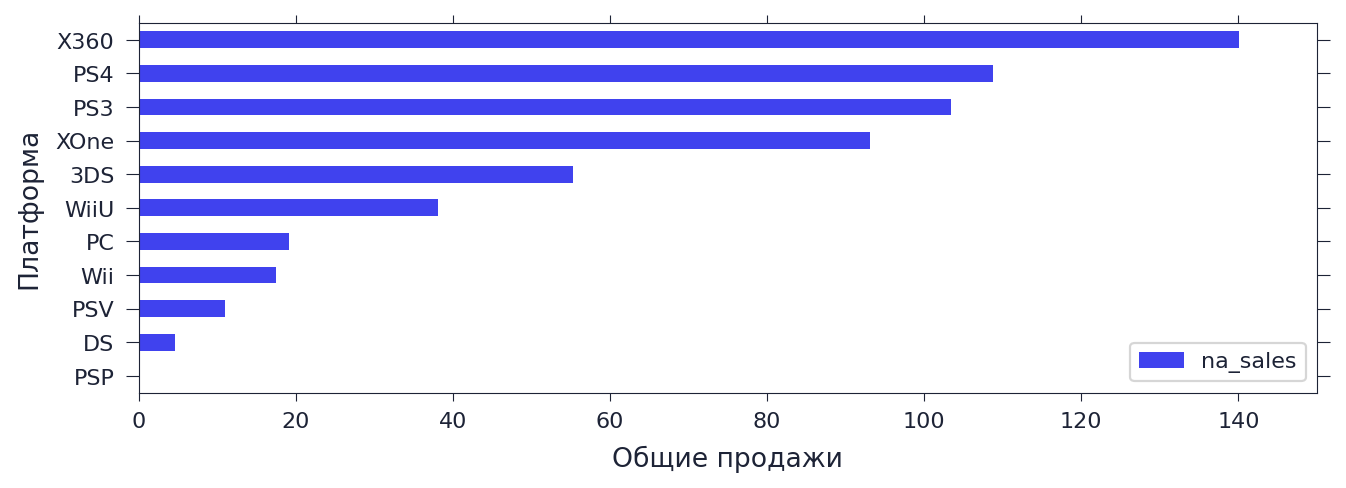

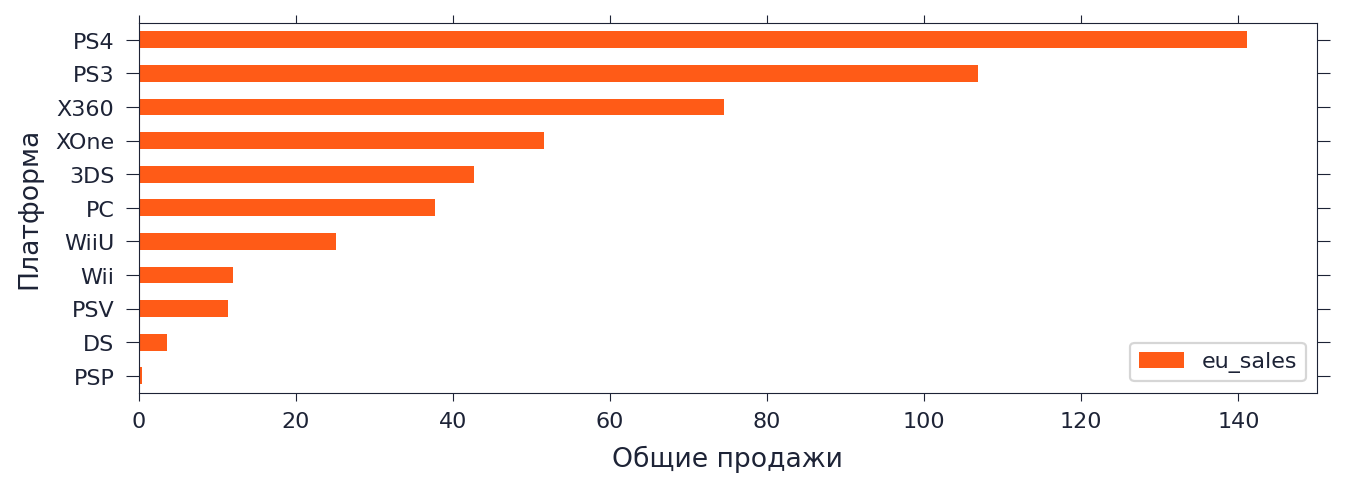

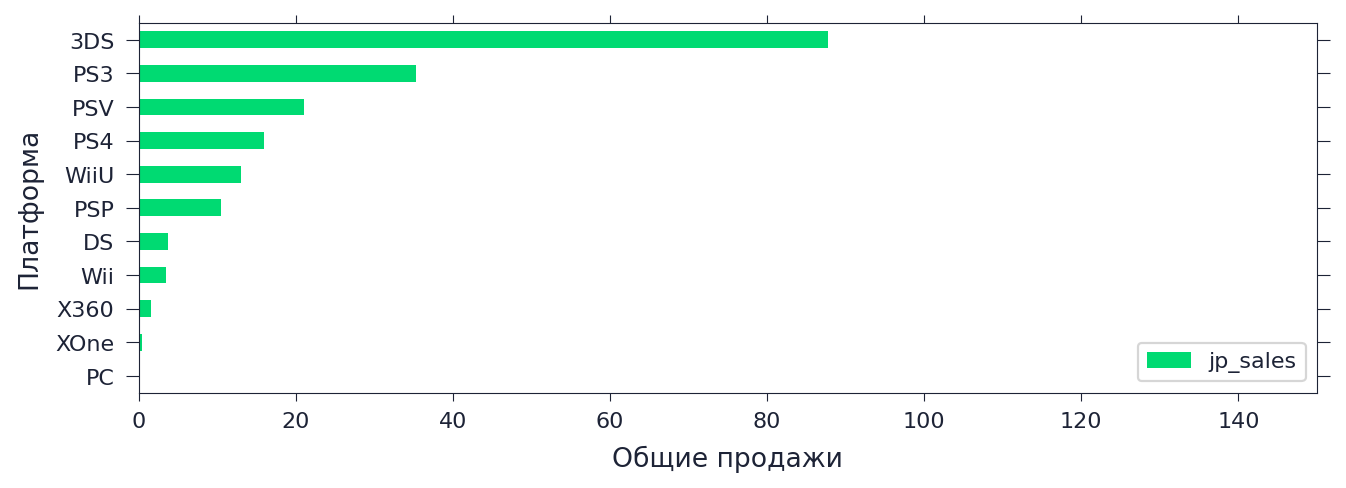

In [42]:
# Получим значения
pivot = df_act.pivot_table(index='platform',
                           values=(['na_sales', 'eu_sales', 'jp_sales']), 
                           aggfunc='sum').reset_index()
display(pivot)
print(f'Суммарные продажи для Северной Америки: {pivot.na_sales.sum():.2f}')
print(f'Суммарные продажи для Европы:           {pivot.eu_sales.sum():.2f}')
print(f'Суммарные продажи для Японии:           {pivot.jp_sales.sum():.2f}\n')

# Построим столбчатые диаграммы
for sales, color in zip(['na_sales', 'eu_sales', 'jp_sales'],
                        ['#4042EE', '#FF5B17', '#00DA72']):
    (df_act.pivot_table(index='platform', values=sales, aggfunc='sum')
     .sort_values(by=sales, ascending=True)
     .plot.barh(color=color, figsize=(9.5, 3),
                xlabel='Общие продажи', ylabel='Платформа',
                label=sales))
    plt.xlim(0, 150)
    plt.legend(loc='lower right');

Столбчатые диаграммы позволяют сделать вывод, что самые прибыльные платформы для рассматриваемых регионов различны; тем не менее, платформы PS4, PS3 и 3DS находятся в числе самых популярных во всех регионах.

Пользователи из Северной Америки и Европы отдают предпочтение X360, PS4 и PS3, в то время как в Японии несомненным лидером по продажам является платформа 3DS.

Топ-5 платформ по продажам для Северной Америки:
1. X360: 23.7%
2. PS4: 18.3%
3. PS3: 17.4%
4. XOne: 15.7%
5. 3DS: 9.3%

Топ-5 платформ по продажам для Европы:
1. PS4: 28.2%
2. PS3: 20.9%
3. X360: 14.6%
4. XOne: 10.3%
5. 3DS: 8.3%

Топ-5 платформ по продажам для Японии:
1. 3DS: 45.8%
2. PS3: 18.3%
3. PSV: 10.9%
4. PS4: 8.3%
5. WiiU: 6.8%

/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/1322098585.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.platform.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/1322098585.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.platform.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/1322098585.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.platform.isin(top_5)][sales].tolist()


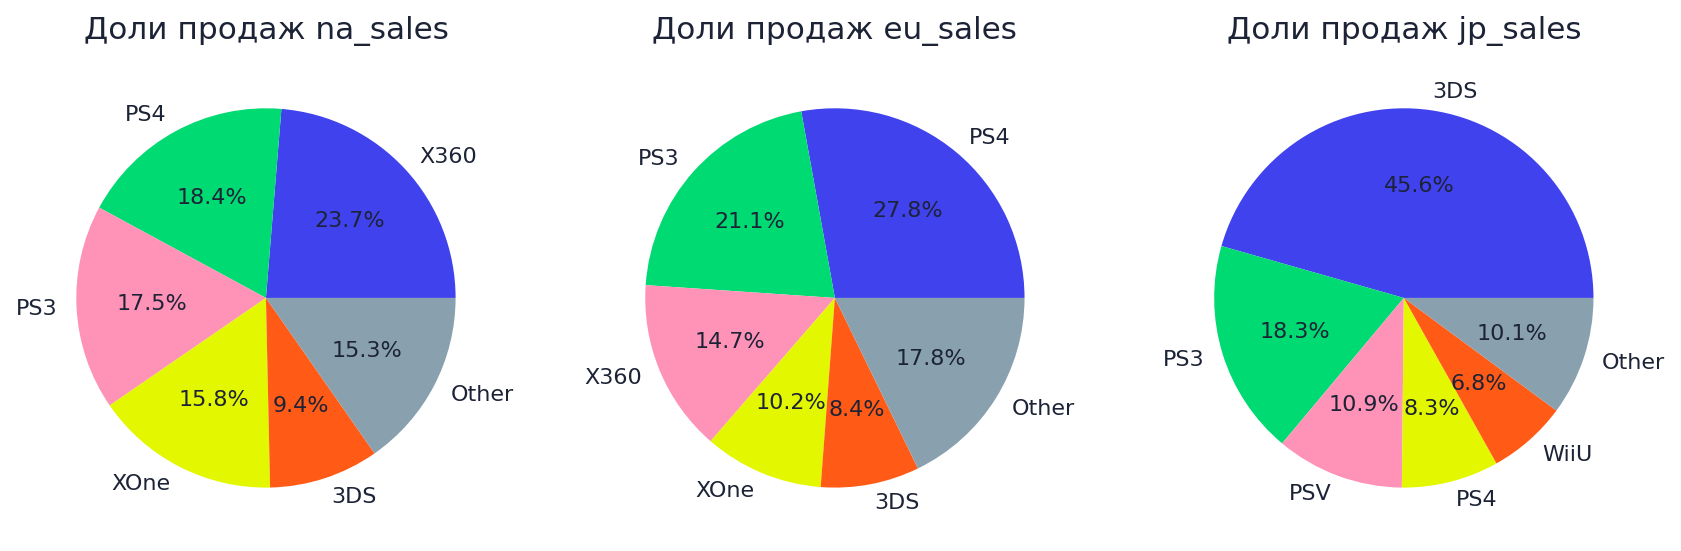

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

for i, sales in zip(range(3), ['na_sales', 'eu_sales', 'jp_sales']):
    top_5 = df_act.groupby('platform').agg({sales: 'sum'}).sort_values(by=sales, ascending=False).head(5).index.to_list()
    other_sales = pivot[sales].sum() - pivot[pivot.platform.isin(top_5)][sales].sum()
    values = pivot.sort_values(by=sales, ascending=False)[pivot.platform.isin(top_5)][sales].tolist()
    values.append(other_sales)
    top_5.append('Other')
    axes[i].pie(values, labels=top_5, autopct='%1.1f%%')
    axes[i].set_title(f'Доли продаж {sales}')

plt.show()

Для пользователей каждого региона определим самые популярные жанры, т. е. те, коотрые приносят наибольшее число продаж:

,genre,eu_sales,jp_sales,na_sales
0,Action,159.339996,52.799999,177.839996
1,Adventure,9.460000,8.240000,8.920000
2,Fighting,10.790000,9.440000,19.789999
3,Misc,26.320000,12.860000,38.189999
4,Platform,21.410000,8.630000,25.379999
5,Puzzle,1.400000,2.140000,1.130000
6,Racing,27.290001,2.500000,17.219999
7,Role-Playing,48.529999,65.440002,64.000000
8,Shooter,113.470001,9.230000,144.770004
9,Simulation,14.550000,10.410000,7.970000


Суммарные продажи для Северной Америки: 590.97
Суммарные продажи для Европы:           506.81
Суммарные продажи для Японии:           192.58



/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/68964890.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.genre.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/68964890.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.genre.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/68964890.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.genre.isin(top_5)][sales].tolist()


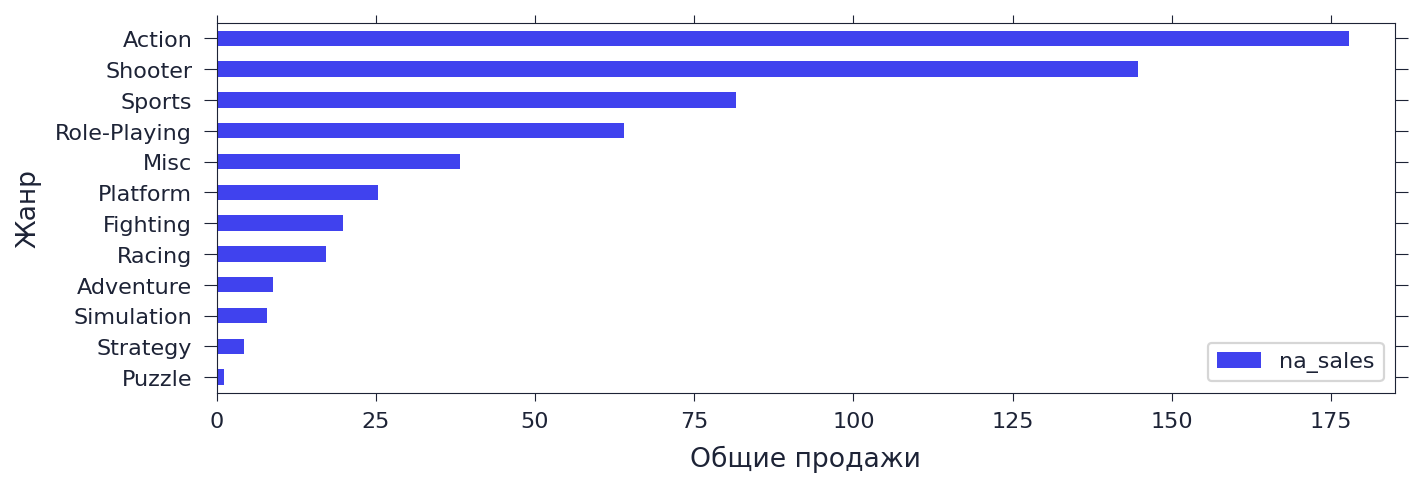

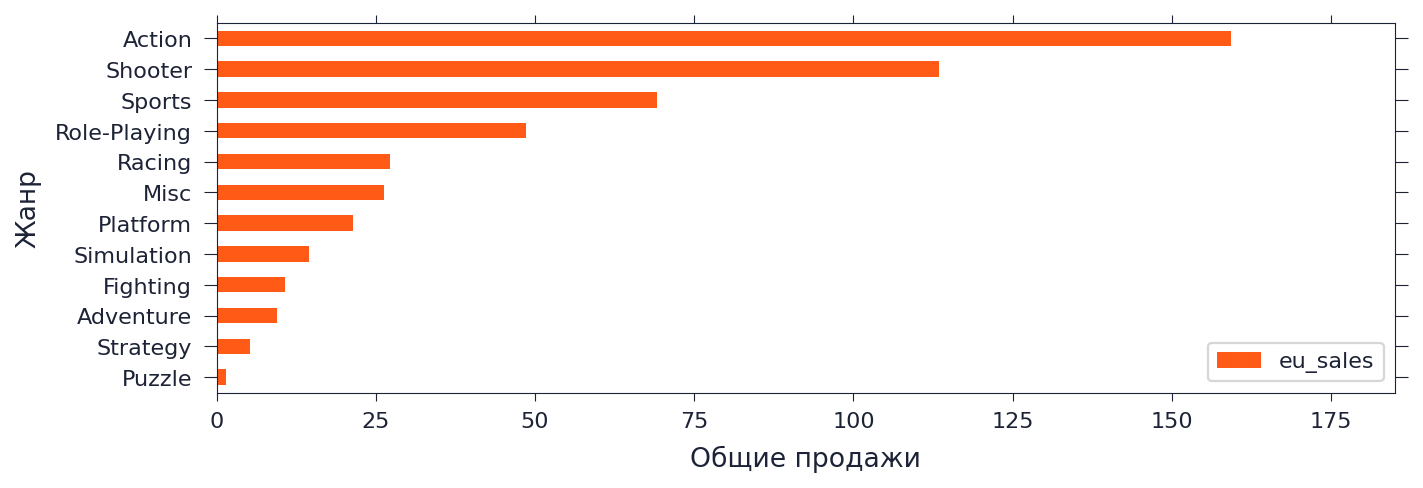

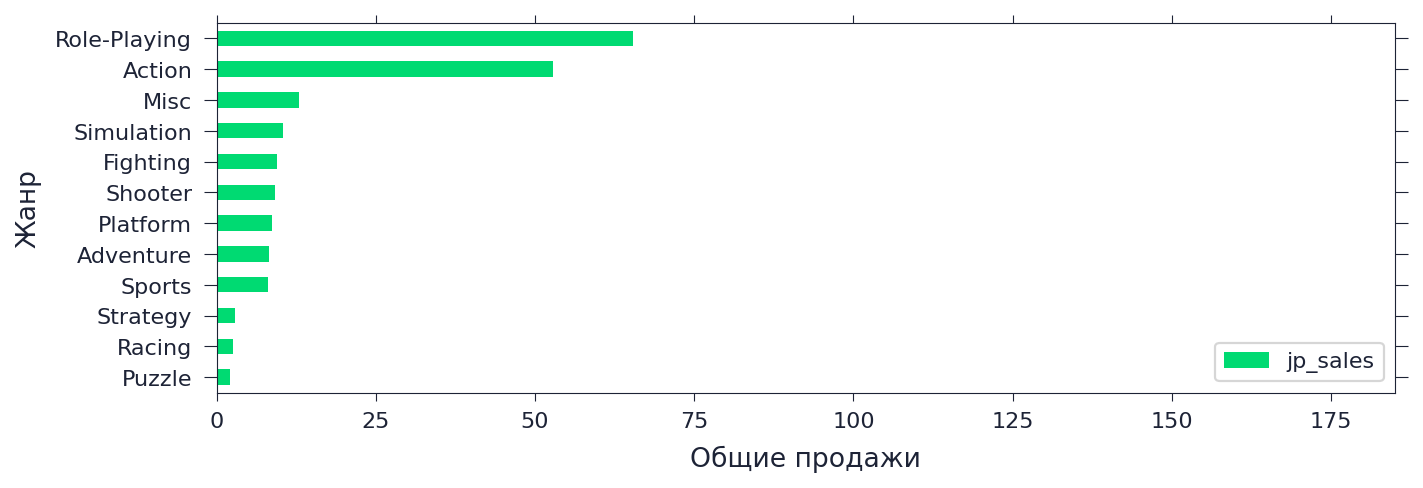

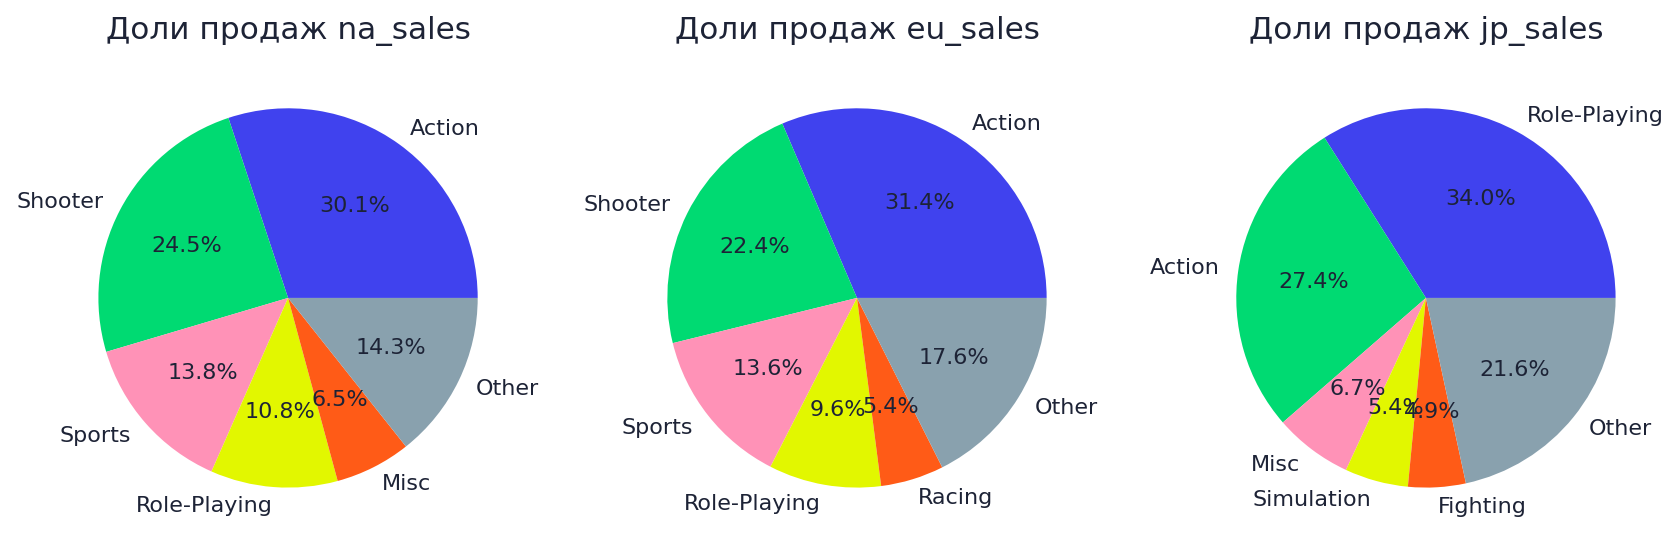

In [44]:
# Получим значения
pivot = df_act.pivot_table(index='genre',
                           values=(['na_sales', 'eu_sales', 'jp_sales']), 
                           aggfunc='sum').reset_index()
display(pivot)
print(f'Суммарные продажи для Северной Америки: {pivot.na_sales.sum():.2f}')
print(f'Суммарные продажи для Европы:           {pivot.eu_sales.sum():.2f}')
print(f'Суммарные продажи для Японии:           {pivot.jp_sales.sum():.2f}\n')

# Построим столбчатые диаграммы
for sales, color in zip(['na_sales', 'eu_sales', 'jp_sales'],
                        ['#4042EE', '#FF5B17', '#00DA72']):
    (df_act.pivot_table(index='genre', values=sales, aggfunc='sum')
     .sort_values(by=sales, ascending=True)
     .plot.barh(color=color, figsize=(9.5, 3),
                xlabel='Общие продажи', ylabel='Жанр',
                label=sales))
    plt.xlim(0, 185)
    plt.legend(loc='lower right');

# Построим круговые диаграммы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

for i, sales in zip(range(3), ['na_sales', 'eu_sales', 'jp_sales']):
    top_5 = df_act.groupby('genre').agg({sales: 'sum'}).sort_values(by=sales, ascending=False).head(5).index.to_list()
    other_sales = pivot[sales].sum() - pivot[pivot.genre.isin(top_5)][sales].sum()
    values = pivot.sort_values(by=sales, ascending=False)[pivot.genre.isin(top_5)][sales].tolist()
    values.append(other_sales)
    top_5.append('Other')
    axes[i].pie(values, labels=top_5, autopct='%1.1f%%')
    axes[i].set_title(f'Доли продаж {sales}')

plt.show()

Предпочтения пользователей из Северной Америки и Европы достаточно схожи по жанрам, в то время как жанры с наибольшими продажами в Японии значительно отличаются:
1. В Топ-5 для пользователей из Европы и Америки входят следующие жанры: Action, Shooter, Sports, Role-Playing и Misc (Америка) или Racing (Европа);
2. В Топ-5 для пользователей из Японии входят: Role Playing и Action (вместе занимающие около 62% продаж), а также Misc, Simulation и Fighting.

Посмотрим, влияет ли рейтинг ESRB на продажи в регионах:

,rating,eu_sales,jp_sales,na_sales
0,E,113.019997,28.330000,114.370003
1,E10+,55.369999,8.190000,75.699997
2,M,193.960007,21.200001,231.570007
3,T,52.959999,26.020000,66.019997


Суммарные продажи для Северной Америки: 487.66
Суммарные продажи для Европы:           415.31
Суммарные продажи для Японии:           83.74



/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/868940969.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/868940969.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/868940969.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()


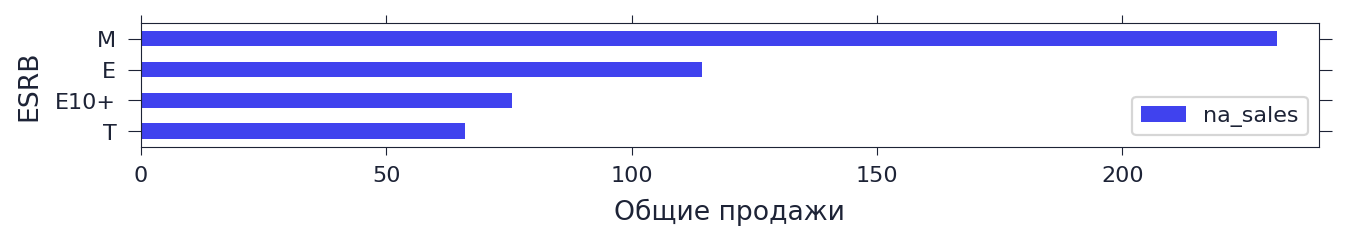

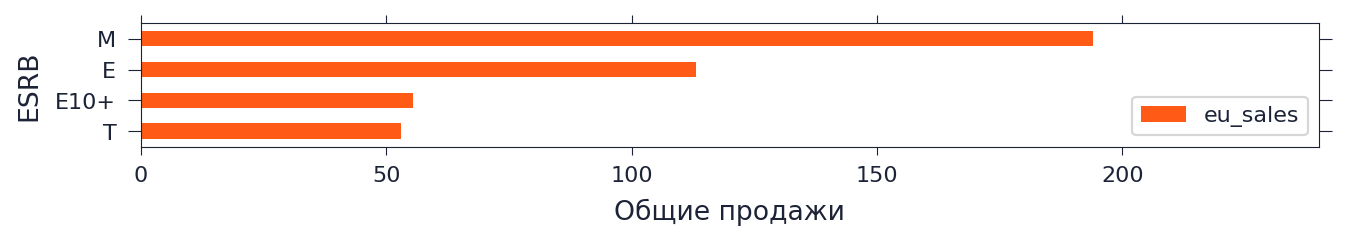

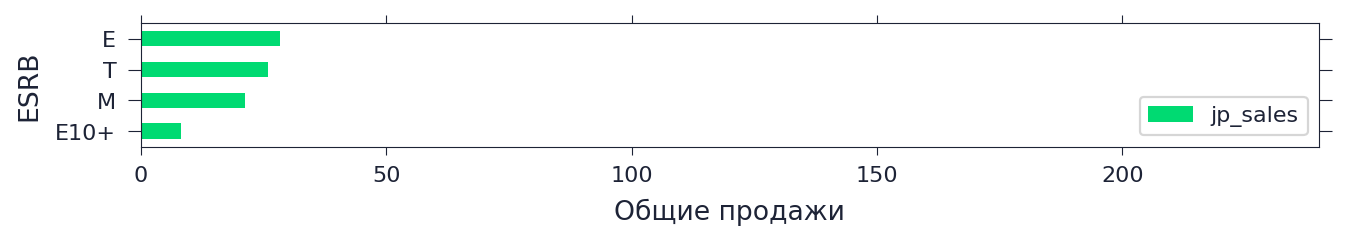

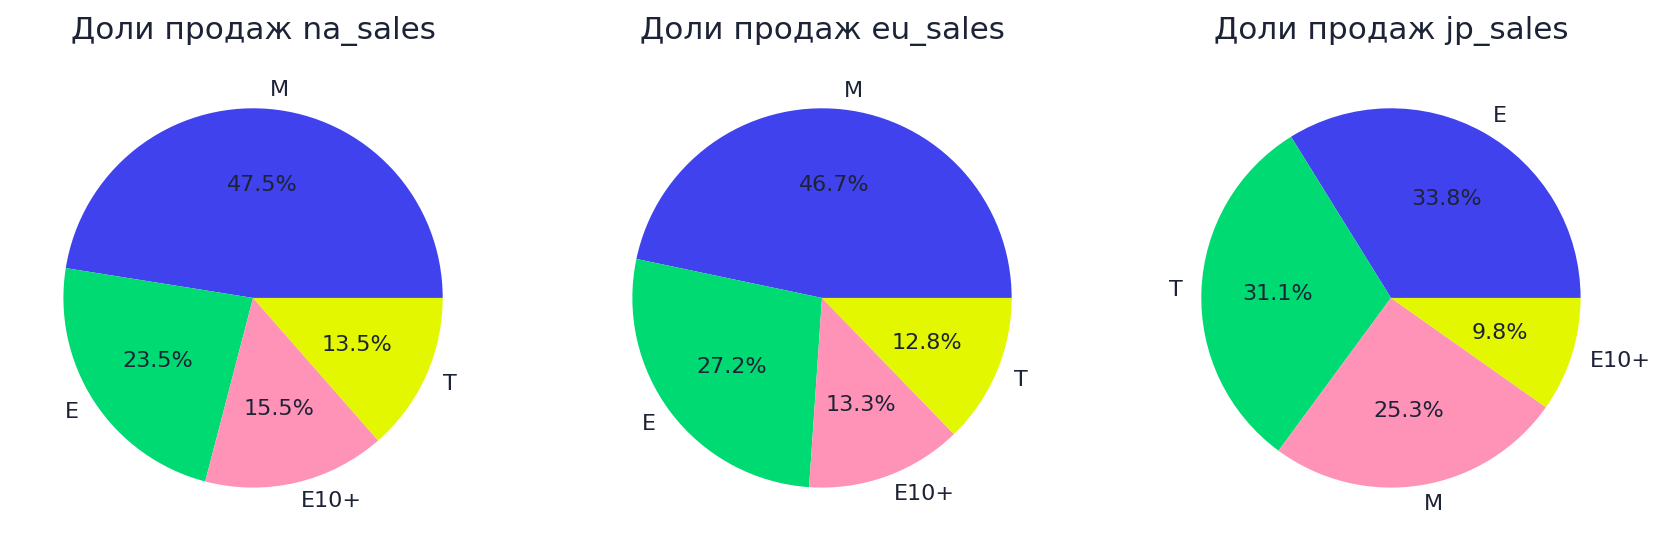

In [45]:
# Получим значения
pivot = df_act.pivot_table(index='rating',
                           values=(['na_sales', 'eu_sales', 'jp_sales']), 
                           aggfunc='sum').reset_index()
display(pivot)
print(f'Суммарные продажи для Северной Америки: {pivot.na_sales.sum():.2f}')
print(f'Суммарные продажи для Европы:           {pivot.eu_sales.sum():.2f}')
print(f'Суммарные продажи для Японии:           {pivot.jp_sales.sum():.2f}\n')

# Построим столбчатые диаграммы
for sales, color in zip(['na_sales', 'eu_sales', 'jp_sales'],
                        ['#4042EE', '#FF5B17', '#00DA72']):
    (df_act.pivot_table(index='rating', values=sales, aggfunc='sum')
     .sort_values(by=sales, ascending=True)
     .plot.barh(color=color, figsize=(9.5, 1),
                xlabel='Общие продажи', ylabel='ESRB',
                label=sales))
    plt.xlim(0, 240)
    plt.legend(loc='lower right');
    
# Построим круговые диаграммы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

for i, sales in zip(range(3), ['na_sales', 'eu_sales', 'jp_sales']):
    top_5 = df_act.groupby('rating').agg({sales: 'sum'}).sort_values(by=sales, ascending=False).head(4).index.to_list()
    values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
    axes[i].pie(values, labels=top_5, autopct='%1.1f%%')
    axes[i].set_title(f'Доли продаж {sales}')

plt.show()

Заполним пропуски в столбце `rating` на `'no rating'` и повторим проделанный шаг:

,rating,eu_sales,jp_sales,na_sales
0,E,113.019997,28.330000,114.370003
1,E10+,55.369999,8.190000,75.699997
2,M,193.960007,21.200001,231.570007
3,T,52.959999,26.020000,66.019997
4,no rating,91.500000,108.839996,103.309998


Суммарные продажи для Северной Америки: 590.97
Суммарные продажи для Европы:           506.81
Суммарные продажи для Японии:           192.58



/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/2905747604.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/2905747604.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
/var/folders/rz/bx8cx1nj0q3gr8wm3c52pzlh0000gn/T/ipykernel_13833/2905747604.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()


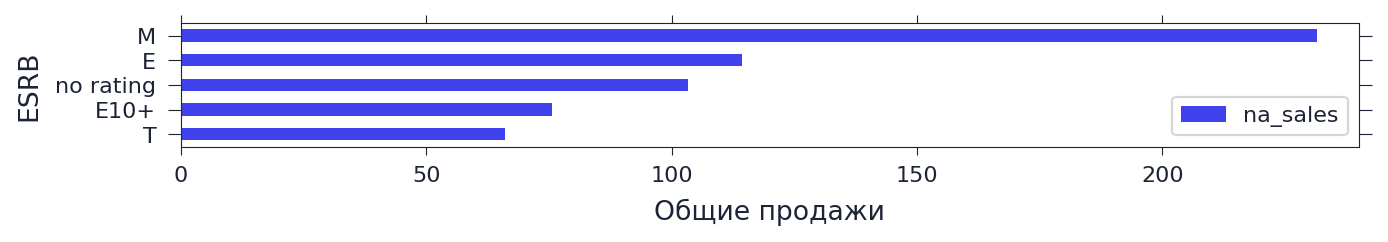

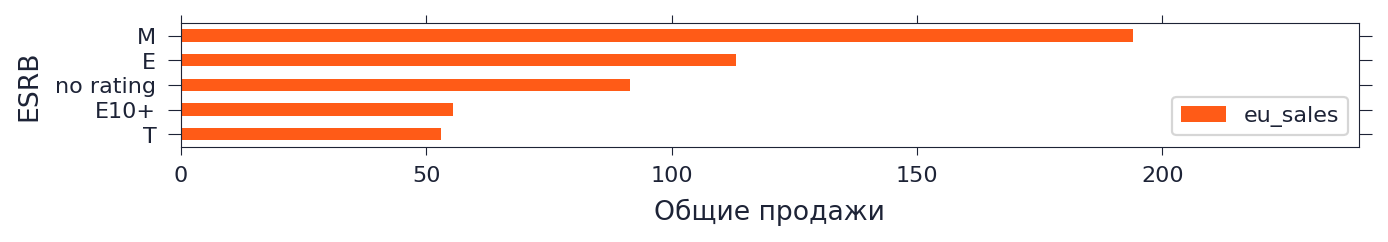

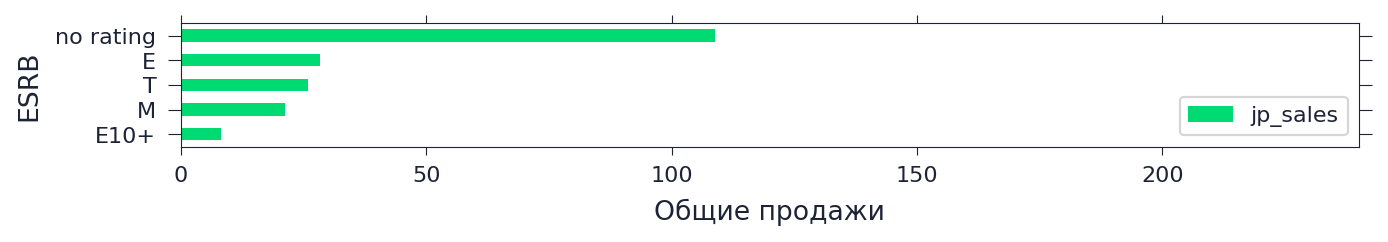

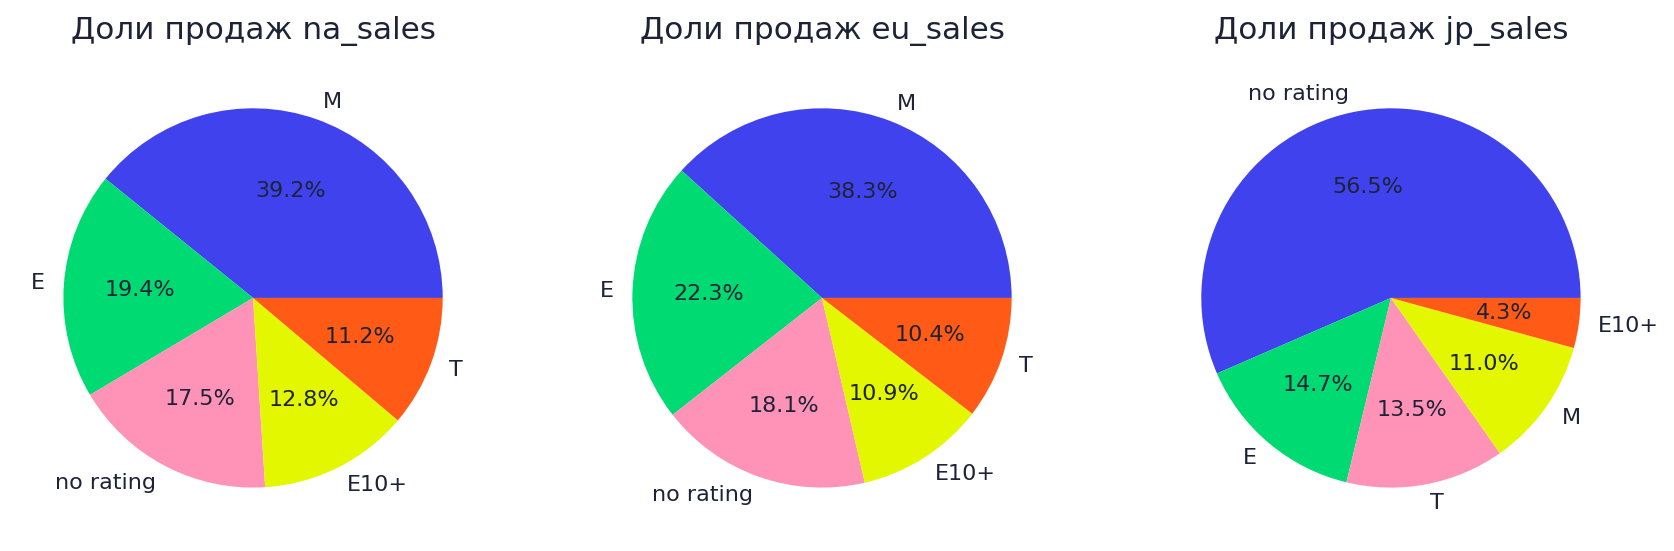

In [46]:
# Создадим копию датафрейма
df_act_fill = df_act.copy()

# Заполним пропуски
df_act_fill['rating'] = df_act_fill['rating'].fillna('no rating')

# Повторим прошлый шаг
# Получим значения
pivot = df_act_fill.pivot_table(index='rating',
                           values=(['na_sales', 'eu_sales', 'jp_sales']), 
                           aggfunc='sum').reset_index()
display(pivot)
print(f'Суммарные продажи для Северной Америки: {pivot.na_sales.sum():.2f}')
print(f'Суммарные продажи для Европы:           {pivot.eu_sales.sum():.2f}')
print(f'Суммарные продажи для Японии:           {pivot.jp_sales.sum():.2f}\n')

# Построим столбчатые диаграммы
for sales, color in zip(['na_sales', 'eu_sales', 'jp_sales'],
                        ['#4042EE', '#FF5B17', '#00DA72']):
    (df_act_fill.pivot_table(index='rating', values=sales, aggfunc='sum')
     .sort_values(by=sales, ascending=True)
     .plot.barh(color=color, figsize=(9.5, 1),
                xlabel='Общие продажи', ylabel='ESRB',
                label=sales))
    plt.xlim(0, 240)
    plt.legend(loc='lower right');
    
# Построим круговые диаграммы
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13, 6))

for i, sales in zip(range(3), ['na_sales', 'eu_sales', 'jp_sales']):
    top_5 = df_act_fill.groupby('rating').agg({sales: 'sum'}).sort_values(by=sales, ascending=False).head(5).index.to_list()
    values = pivot.sort_values(by=sales, ascending=False)[pivot.rating.isin(top_5)][sales].tolist()
    axes[i].pie(values, labels=top_5, autopct='%1.1f%%')
    axes[i].set_title(f'Доли продаж {sales}')

plt.show()

Как и в прошлый раз, для пользователей из Европы и Америки наблюдаются схожие картины:
* Около 50% продаж занимают игры с рейтингом M (17+);
* Около 25% продаж — игры с рейтингом E (для всех);
* Продажи игр с рейтингами E10+ (для всех 10+) и T (13+) примерно равны и занимают примерно по 13%.

В Японии же заметной разницы между продажами игр с разными рейтингами не наблюдается; исключение — наибольшие продажи для игр без рейтинга.

**Вероятно, эта закономерность объясняется тем, что ESRB предназначен для определения рейтингов компьютерных игр в Америке и Канаде, в то время как в Японии наибольешей популярностью пользуются игры, предназначенные для японского рынка (как, например, японские ролевые игры, о которых говорилось ранее), и, следовательно, не нуждающиеся в установке рейтинга ESRB.**

**Выводы:**
Анализ позволил выявить некоторые различия между "типичными" пользователями дял всех регионов: часто пользователи из Америки и Европы схожи между собой, но их предпочтения сильно отличаются от того, что нравится пользователям из Японии — данный факт можно объяснить социальными и культурными различиями между этими странами:
* Пользователи из Северной Америки и Европы отдают предпочтение X360, PS4 и PS3, в то время как в Японии несомненным лидером по продажам является платформа 3DS;
* Пользователи из Северной Америки и Европы предпочитают игры жанра экшен и шутеры, в то время как среди японцев наибольшей популярностью пользуются ролевые игры (действительно, большинство таких игр изначально разрабатывалось в Японии исключительно для японского рынка);
* Рейтинг ESBR влияет на продажи среди пользователей Европы и Америки: наибольшей популярностью пользуются игры для взрослых (M) и игры без возрастных ограничений (E), в то время как в Японии продажи для всех рейтингов примерно одинаковы.

## 5. Проверка гипотез
<a class="anchor" id="5.0"></a>

Проверим, действительно ли средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* $H_0$: $\mu_{\text{XOne}}=\mu_{\text{PC}}$, т. е. средние пользовательские рейтинги для генеральной совокупности игр платформы Xbox One равны средним пользовательским рейтингам для генеральной совокупности игр PC
* $H_1$: $\mu_{\text{XOne}}\neq \mu_{\text{PC}}$, т. е. средние пользовательские рейтинги для генеральной совокупности игр платформы Xbox One не равны средним пользовательским рейтингам для генеральной совокупности игр PC

Будем применять t-тест для проверки двухсторонней гипотезы о равенстве средних в двух генеральных совокупностях со значением уровня статистической значимости $\alpha=0.05$. Получим общую информацию по выборкам для проверки условий применения t-теста:

In [47]:
platforms = ['XOne', 'PC']
pivot = (df_act.query('platform in @platforms')
         .pivot_table(index='platform', values='user_score',
                      aggfunc=['count', 'mean', 'std'])
         .reset_index())
pivot.columns = ['platform', 'count', 'mean', 'std']
pivot

,platform,count,mean,std
0,PC,206,64.286408,16.644651
1,XOne,182,65.214286,13.809406


1. Выборки независимы;
2. Число наблюдений в выборках более 30, поэтому можно утверждать, что распределение выборочных средних близко к нормальному (в соответствии с ЦПТ);
3. Гомогенность дисперсий: можно утверждать, что диперсии для обеих выборок примерно равны.

In [48]:
# Проведем t-тест
alpha = 0.05
result = st.ttest_ind(df_act[(df_act.platform == 'PC') & (~(df_act.user_score.isna()))].user_score.astype(int),
                      df_act[(df_act.platform == 'XOne') & (~(df_act.user_score.isna()))].user_score.astype(int))

print(f'p-value: {result.pvalue:.3f}')
if result.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 0.554
Нет оснований отклонить нулевую гипотезу


**Вывод:** Результаты двухстороннего t-теста со значением уровня статистической значимости $\alpha=0.05$ показали, что нет оснований отвергать нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC со значнием p-value $0.554$.

Проверим, действительно ли cредние пользовательские рейтинги жанров Action и Sports разные.

* $H_0$: $\mu_{\text{Action}}=\mu_{\text{Sports}}$, т. е. средние пользовательские рейтинги для генеральной совокупности игр жанра Action равны средним пользовотельским рейтингам для генеральной совокупности игр жанра Sports
* $H_1$: $\mu_{\text{Action}} > \mu_{\text{Sports}}$, т. е. средние пользовательские рейтинги для генеральной совокупности игр жанра Action больше, чем средние пользвательские рейтинги для генеральной совокупности игр жанра Sports

Будем применять t-тест для проверки двухсторонней гипотезы о равенстве средних в двух генеральных совокупностях со значением уровня статистической значимости $\alpha=0.05$. Получим общую информацию по выборкам для проверки условий применения t-теста:

In [49]:
genres = ['Action', 'Sports']
pivot = (df_act.query('genre in @genres')
         .pivot_table(index='genre', values='user_score',
                      aggfunc=['count', 'mean', 'std'])
         .reset_index())
pivot.columns = ['genre', 'count', 'mean', 'std']
pivot

,genre,count,mean,std
0,Action,523,68.250478,13.744395
1,Sports,194,54.556701,17.431417


1. Выборки независимы;
2. Число наблюдений в выборках более 30, поэтому можно утверждать, что распределение выборочных средних близко к нормальному (в соответствии с ЦПТ);
3. Гомогенность дисперсий: можно утверждать, что диперсии для обеих выборок примерно равны.

In [50]:
# Проведем t-тест
alpha = 0.05
result = st.ttest_ind(df_act[(df_act.genre == 'Action') & (~(df_act.user_score.isna()))].user_score.astype(int),
                      df_act[(df_act.genre == 'Sports') & (~(df_act.user_score.isna()))].user_score.astype(int))

print(f'p-value: {result.pvalue:}')
if result.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Нет оснований отклонить нулевую гипотезу')

p-value: 4.8045233804624693e-26
Отклоняем нулевую гипотезу


**Вывод:** Результаты двухстороннего t-теста со значением уровня статистической значимости $\alpha=0.05$ показали, что есть основания отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports со значением p-value $4.8 \cdot 10^{-26}$.

## 6. Выводы
<a class="anchor" id="6.0"></a>

В работе использовался датасет, содержащий данные о компьютерных играх: основная информация об игре, ее продажи и оценки от пользователей и критиков; он состоит из 11 столбцов 16 715 наблюдений.

Была проведена предобработка данных:
1. Были удалены 2 неявных дубликата и 2 наблюдения (с пропусками в столбцах `name` и `genre`);
2. Значения `tbd` столбца `user_score` были заменены на пропуски;
3. Был добавлен столбец `total_sales` с информацией по общим продажам для кадой игры;
4. Пропуска в столбцах `year_of_release`, `critic_score`, `user_score` и `rating` были оставлены.

Был проведен исследовательский анализ данных:
1. Был установлен характерный срок, за который появляются новые и исчерзают старые платформы, равный, в среднем, 7.7 годам;
2. В качестве акутального периода для анализа был выбран период с 2012 по 2016 год: выбор такого актуального периода позволит обратить внимание на те платформы, которые уже являются достаточно успешными, и, в то же время, еще не достигли этапа спада продаж;
3. На основе линейных графиков для платформ за выбранный актуальный период были сделаны прогнозы о потенциально прибыльных платформах, которые уже являются достаточно успешными и в последнее время характеризуются ростом продаж; к ним относятся:
    * В первую очередь, PS4 и XOne, появившиеся сравнительно недавно, и для которых уже свойственны высокие продажи;
    * Во вторую очередь, WiiU, которая потенциально может прийти на смену платформе Wii.
4. В основном общие продажи для всех платформ, выпускавших игры за актуальный период, редко превышают 1.5 млн копий: таких игр всего 7.73% от общего числа игр; только на 4 платформах присутствуют игры с общими продажами более 10 млн копий: к ним относятся X360, PS4, PS3 и 3DS, а всего таких игр — 9 штук, т. е. всего 0.31% от общего числа игр;
5. На основе полученных диаграмм рассеяния и коэффициентов корреляции между отзывами и продажами можно сделать вывод о том, что высокие оценки критиков (в отличие от оценок пользователей) могут свидетельствовать о потенциальной прибыльности той или иной платформы:
    * Критики, как правило, оценивают игры выше, чем пользователи: средние значения составляют $\bar{x}_{\text{critic}}=72.3, \ \bar{x}_{\text{user}}=66.4$; кроме того, оценки пользователей являются и более вариативными со стандартными отклонениями $\text{sd}_{\text{critic}}=12.7, \ \text{sd}_{\text{user}}=15.7$;
    * С другой стороны, пользователи чаще ставят высокие оценки играм, которые не отличаются высокими продажами: это подтверждается и значениями коэффициентов корреляции $\text{Corr}_{\text{critic}}=0.308, \ \text{Corr}_{\text{user}}=0.004$.
6. Наиболее популярным жанром является Action: ему свойственны наибольшие продажи — более 400 млн копий, что состаляет 30.5% от общих продаж; к другим наиболее коммерчиски успешным жанрам относятся Shooter, Role-Playing и Sports;
7. Так или иначе, в целом, продажи игр по всем платформам за период 2015-2016 гг. снизились: это может быть связано с циклическими трендами в индустрии или, например, с отсутствием крупных релизов.

Анализ позволил выявить некоторые различия между "типичными" пользователями для всех регионов: часто пользователи из Америки и Европы схожи между собой, но их предпочтения сильно отличаются от того, что нравится пользователям из Японии — данный факт можно объяснить социальными и культурными различиями между этими странами:
1. Пользователи из Северной Америки и Европы отдают предпочтение платформам X360, PS4 и PS3, в то время как в Японии несомненным лидером по продажам является платформа 3DS;
2. Пользователи из Северной Америки и Европы предпочитают игры жанра экшен и шутеры, в то время как среди японцев наибольшей популярностью пользуются ролевые игры (действительно, большинство таких игр изначально разрабатывалось в Японии исключительно для японского рынка);
3. Рейтинг ESBR влияет на продажи среди пользователей Европы и Америки: наибольшей популярностью пользуются игры для взрослых (M) и игры без возрастных ограничений (E), в то время как в Японии наибольшие продажи свойственны играм без рейтинга ESBR: вероятно, это объясняется тем, что наибольшей популярностью в Японии пользуются игры, выпускающиеся исключительно для внутреннего рынка, и, таким образом, не нуждающиеся в присвоении такого рейтинга.

Наконец, были проверены некоторые статистические гипотезы:
1. Результаты двухстороннего t-теста со значением уровня статистической значимости $\alpha=0.05$ показали, что нет оснований отвергать нулевую гипотезу о равенстве средних пользовательских рейтингов платформ Xbox One и PC со значнием p-value $0.554$;
2. Результаты двухстороннего t-теста со значением уровня статистической значимости $\alpha=0.05$ показали, что есть основания отклонить нулевую гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports со значением p-value $4.8 \cdot 10^{-26}$.

**На основе проведенного анализа можно составить следующие рекомендации отделу маркетинга для проведения рекламной кампании в 2017 году:**
1. *Платформы*: Наибольшее внимание при разработке рекламной кампании стоит уделить платформам PS4 и XOne, и, во вторую очередь, платформе WiiU: анализ показал, что эти платформы являются потенциально выгодными в 2017 г.;
2. *Жанры*: Наибольшее внимание стоит уделить играм с жанрами Action и Shooter: они являются наиболее прибыльными среди пользователей Северной Америки и Европы (т. е. для того рынка, на который ориентируются потребители в России);
3. *Рейтинг ESRB*: Внимание пользователей необходимо сконцентрировать на играх с рейтингом M (17+), т. к. они являются наиболее прибыльными в Северной Америке и Европе;
4. Кроме того, для определения коммерческого успеха игры полезно использовать рейтинг критиков: их оценки имеют среднюю положительную корреляцию с общими доходами от игры. Если какая-либо игра получает высокую оценку критика в течение 2017 г., есть смысл внести корректировки в текущую рекламную кампанию и обратить внимание пользователей на эту игру.